# Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

## 1 - CSV Processing Functions

### 1.1 Processing and Averaging Frontal or Back Electrodes

In [4]:
def process_and_average(arr, wave, placement="f"):
    """
    Get average power of either frontal or back electrodes for a given time
    
    Arguments:
        arr         -- CSV Data Frame for a trial of a person (Ex. Baseline recording for subject N)
        wave        --   String to identify wave type (Alpha, Beta, Theta, Gamma, Delta)
        placement   -- String to identify if it is back or front electrodes
    
    Returns:
        averaged_power -- (n_times) numpy array 
    """

    # Process Wave Identifier
    wave = wave.title()

    # Create temporary arrays to contain the AF7 and AF8 electrode recordings
    temp1 = None
    temp2 = None

    # Isolate the frontal electrodes
    if placement.lower() == "f":
        temp1 = arr[wave+"_AF7"]
        temp2 = arr[wave+"_AF8"]

    # Isolate the back electrodes
    elif placement.lower() == "b":
        temp1 = arr[wave+"_TP9"]
        temp2 = arr[wave+"_TP10"]

    # Invalid electrode placement
    else:
        raise Exception('Invalid Electrode Placement')
    
    # Drop all the NaN values
    temp1.dropna(axis = 0, inplace=True)
    temp2.dropna(axis = 0, inplace=True)

    # Average both electrode arrays
    temp1 = np.exp(temp1)
    temp2 = np.exp(temp2)
    avg = ( temp1 + temp2 ) / 2

    # Convert from dB to actual FFT values
    # avg = 2**avg
    # avg = (((avg + 1) * (100)) / (2))

    return avg.to_numpy()

### 1.2 Getting Specific Wave Type for all Trials

In [5]:
def get_wave(wave, placement, baseline, easy, hard, extreme):
    """
    Return a specific wave from all trials
    
    Arguments:
        wave        -- String to identify wave type (Alpha, Beta, Theta, Gamma, Delta)
        placement   -- String to identify if it is back or front electrodes
        baseline    -- CSV Data Frame for all baseline trials
        easy        -- CSV Data Frame for all easy trials
        medium      -- CSV Data Frame for all medium trials
        hard        -- CSV Data Frame for all hard trials
        extreme     -- CSV Data Frame for all extreme trials
    Returns:
        data        -- (n_difficulty, n_subject, n_time) numpy array 
    """

    data    = []
    base_   = [process_and_average(i, wave, placement) for i in baseline]
    easy_   = [process_and_average(i, wave, placement) for i in easy]
    hard_   = [process_and_average(i, wave, placement) for i in hard]
    ext_    = [process_and_average(i, wave, placement) for i in extreme]

    data.append(base_)
    data.append(easy_)
    data.append(hard_)
    data.append(ext_)

    return data
    # Data[0] = Baseline data for all subjects with desired wave type
    # Data[0][0] = Baseline data for subject 1 with desired wave type

### 1.3 Processing all Data

In [6]:
baseline = []
easy = []
hard = []
extreme = []

n_subjects = 0
dir_path = 'Survival/Baseline'

for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        n_subjects += 1

print(n_subjects)


for n in range(0, n_subjects):
    i=n+1
    baseline.append(pd.read_csv('Survival/Baseline/'+str(i)+'.csv'))
    easy.append(pd.read_csv('Survival/Easy/'+str(i)+'.csv'))
    hard.append(pd.read_csv('Survival/Hard/'+str(i)+'.csv'))
    extreme.append(pd.read_csv('Survival/Extreme/'+str(i)+'.csv'))



8


## 2 - Plotting Absolute Wave Types

### 2.1 Plotting Function

In [7]:
def plot_wave(wave, placement, baseline, easy, hard, extreme):
    """
    Return a specific wave from all trials
    
    Arguments:
        wave        -- String to identify wave type (Alpha, Beta, Theta, Gamma, Delta)
        placement   -- String to identify if it is back or front electrodes
        baseline    -- CSV Data Frame for all baseline trials
        easy        -- CSV Data Frame for all easy trials
        hard        -- CSV Data Frame for all hard trials
        extreme     -- CSV Data Frame for all extreme trials
    Returns:
        none        -- Prints Box Plots
    """

    # Gets Data for specific wave
    data = get_wave(wave, placement, baseline, easy, hard, extreme)

    # Calculate mean
    mean_base = [i.mean() for i in data[0]]
    mean_easy = [i.mean() for i in data[1]]
    mean_hard = [i.mean() for i in data[2]]
    mean_ext  = [i.mean() for i in data[3]]

    # Calculate standard deviation
    std_base = [i.std() for i in data[0]]
    std_easy = [i.std() for i in data[1]]
    std_hard = [i.std() for i in data[2]]
    std_ext  = [i.std() for i in data[3]]

    # Plotting
    labels = [f'Subject {i+1}' for i in range(n_subjects)]
    x = np.arange(len(labels))
    width = 0.15

    fig, ax = plt.subplots(figsize=(12,6))
    rects1 = ax.bar(x,          mean_base, width, yerr=std_base, label = "Baseline", capsize = 5)
    rects2 = ax.bar(x+ width,   mean_easy, width, yerr=std_easy, label = "Easy", capsize = 5)
    rects4 = ax.bar(x+ 2*width, mean_hard, width, yerr=std_hard, label = "Hard", capsize = 5)
    rects5 = ax.bar(x+ 3*width, mean_ext, width, yerr=std_ext, label = "Extreme", capsize = 5)

    # Labels
    electrode_placement = ""
    if placement.lower() == "f":
        electrode_placement = "Front"
    else:
        electrode_placement = "Back"

    ax.set_ylabel(wave + " [dB]")
    ax.set_title(electrode_placement + " " + wave + " Levels")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

### 2.2 Plotting Front Absolute Box Plots

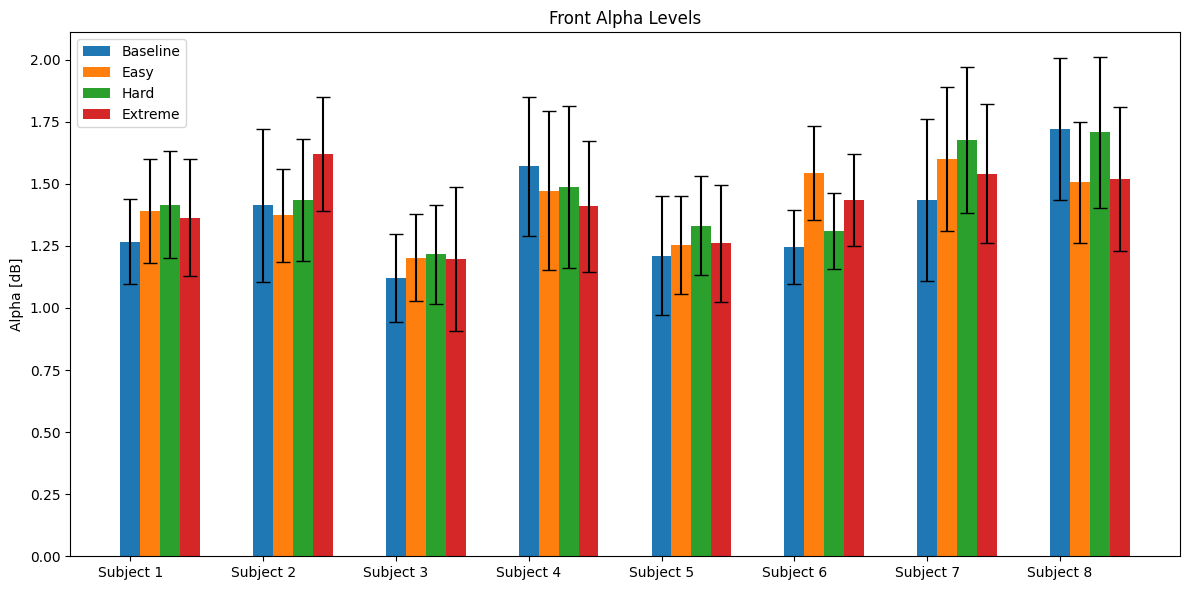

In [8]:
plot_wave("Alpha", "f", baseline, easy, hard, extreme)

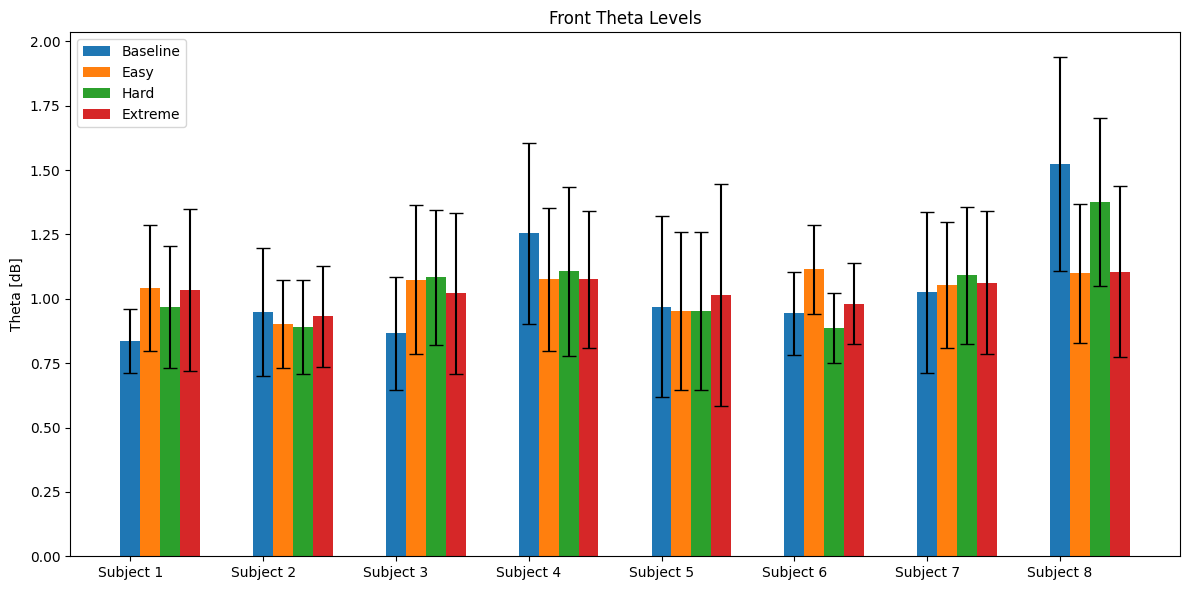

In [9]:
plot_wave("Theta", "f", baseline, easy, hard, extreme)

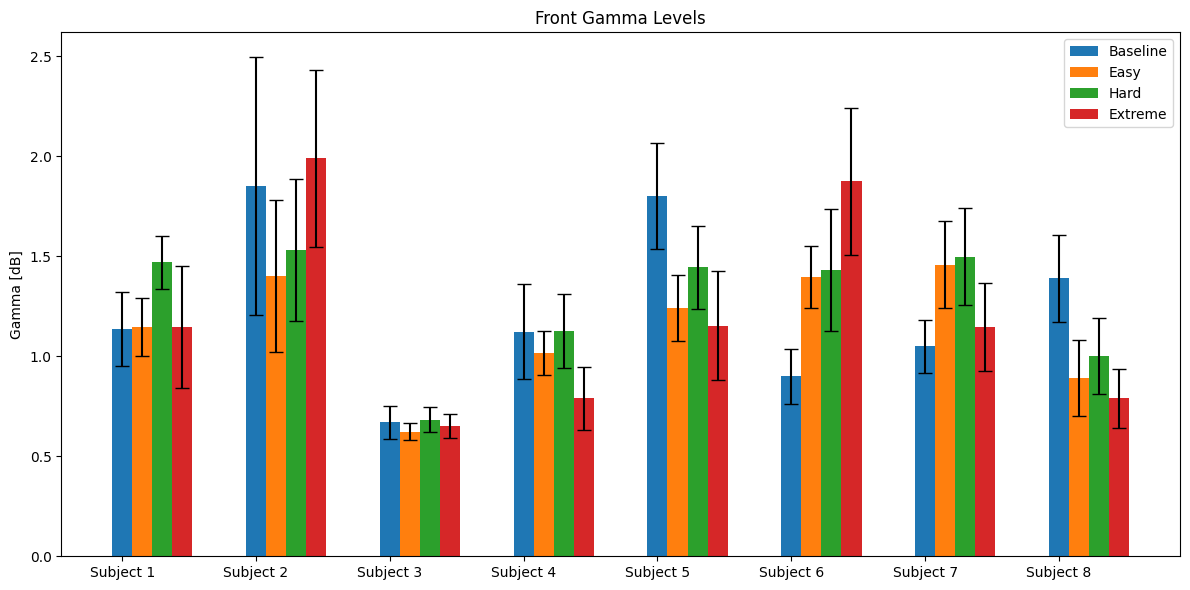

In [10]:
plot_wave("Gamma", "f", baseline, easy, hard, extreme)

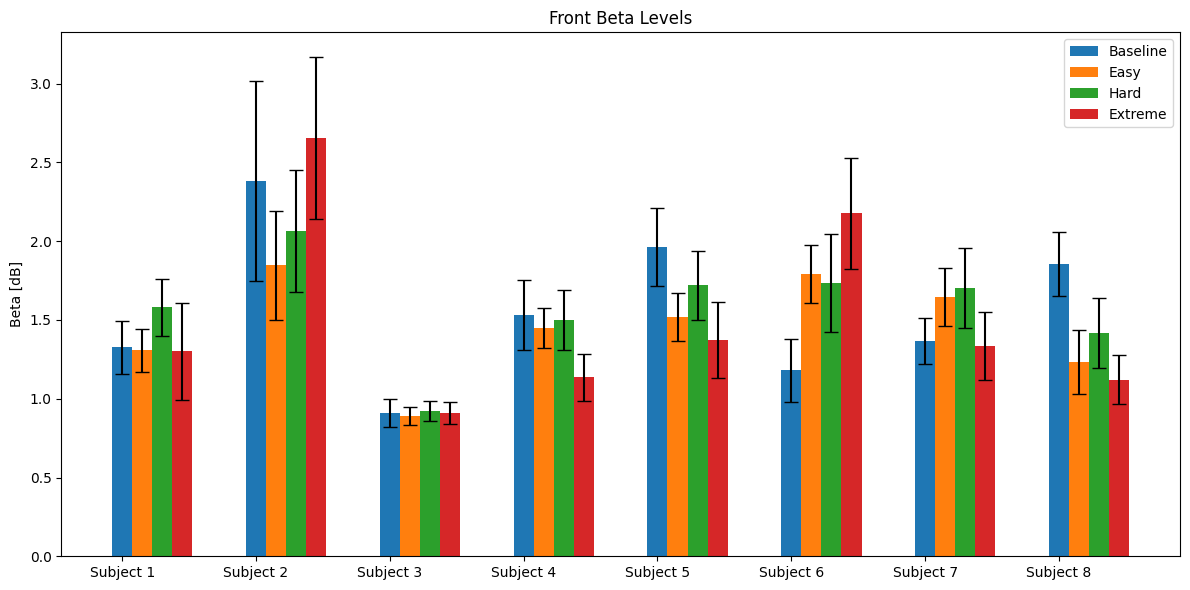

In [11]:
plot_wave("Beta", "f", baseline, easy, hard, extreme)

### 2.3 Plotting Front Absolute Box Plots

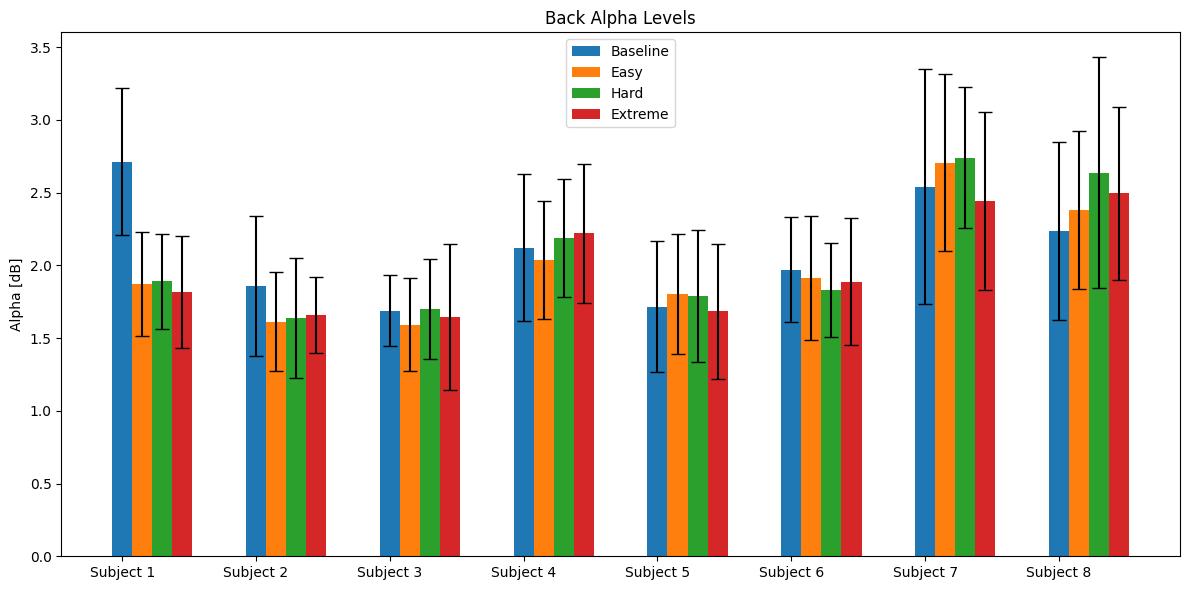

In [12]:
plot_wave("Alpha", "b", baseline, easy, hard, extreme)

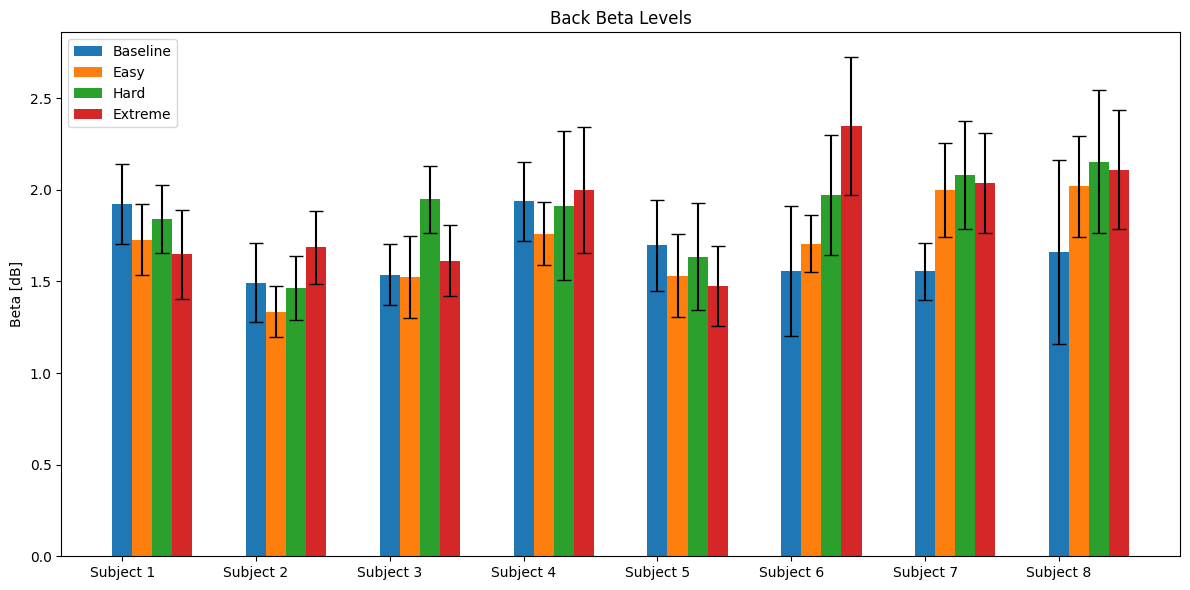

In [13]:
plot_wave("Beta", "b", baseline, easy, hard, extreme)

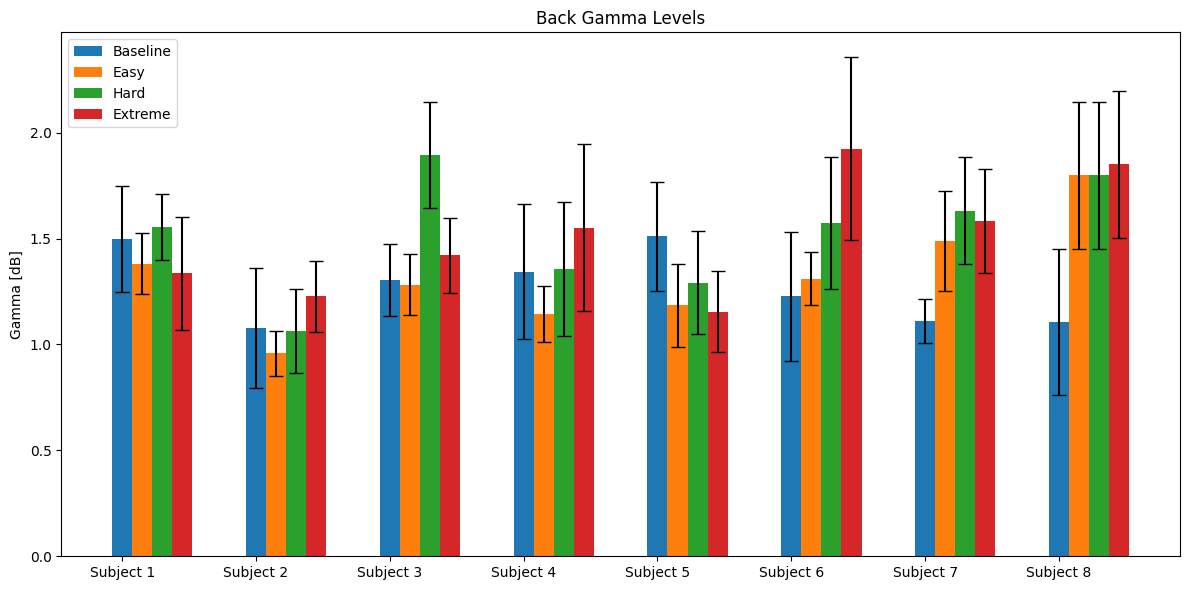

In [14]:
plot_wave("Gamma", "b", baseline, easy, hard, extreme)

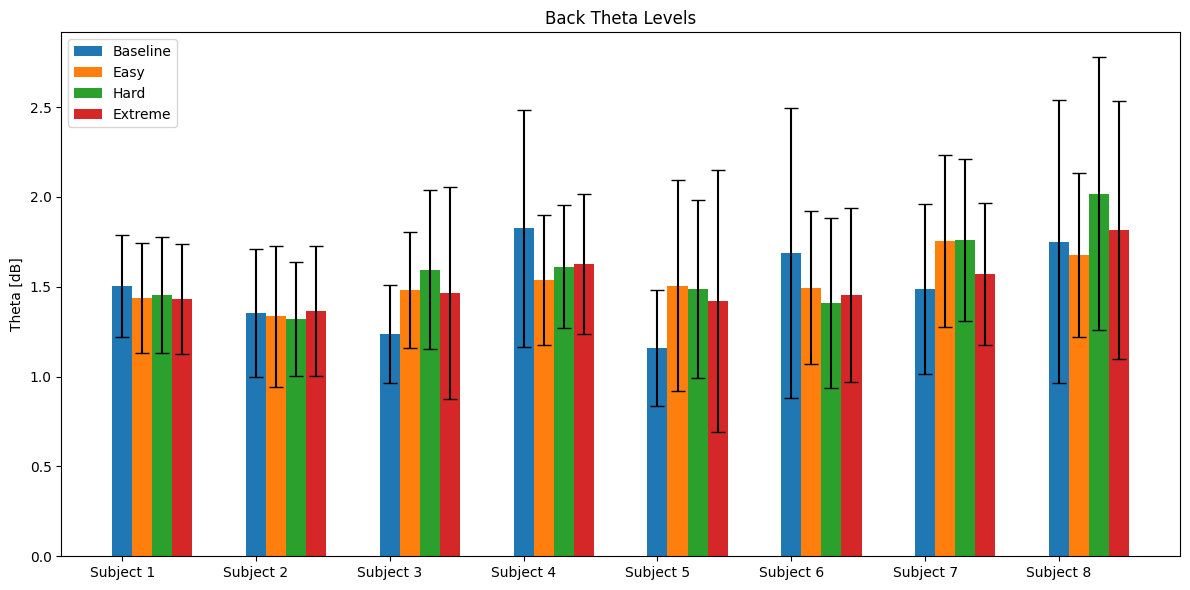

In [15]:
plot_wave("Theta", "b", baseline, easy, hard, extreme)

## 3 - Plotting Relative Wave Types

### 3.1 Calculating Relative Waves

In [17]:
def calculate_relative(placement, baseline, easy, hard, extreme):
    """
    Return an array containing all relative powers
    
    Arguments:
        baseline    -- CSV Data Frame for all baseline trials
        easy        -- CSV Data Frame for all easy trials
        hard        -- CSV Data Frame for all hard trials
        extreme     -- CSV Data Frame for all extreme trials
    Returns:
        relative_data -- (n_wave, n_difficulty, n_subjects, n_time) numpy array
    """

    # Gets all the Wave Types
    alpha_ = get_wave("Alpha", placement, baseline, easy, hard, extreme)
    beta_ = get_wave("Beta", placement, baseline, easy, hard, extreme)
    delta_ = get_wave("Delta", placement, baseline, easy, hard, extreme)
    theta_ = get_wave("Theta", placement, baseline, easy, hard, extreme)
    gamma_ = get_wave("Gamma", placement, baseline, easy, hard, extreme)

    # 0-Alpha, 1-Beta, 2-Delta, 3-Theta, 4-Gamma
    relative_powers = [] #size - (power, difficulty, n_subject, n_time)
    
    # Alpha Relative
    alpha_rel = []
    for i in range(0, 4):
        power = []
        for j in range(n_subjects):
            power.append(
                alpha_[i][j] / (alpha_[i][j] + beta_[i][j] + delta_[i][j] + theta_[i][j] + gamma_[i][j])
            )

        alpha_rel.append(power)

    # Beta Relative
    beta_rel = []
    for i in range(0, 4):
        power = []
        for j in range(n_subjects):
            power.append(
                beta_[i][j] / (alpha_[i][j] + beta_[i][j] + delta_[i][j] + theta_[i][j] + gamma_[i][j])
            )

        beta_rel.append(power)

    # Delta Relative
    delta_rel = []
    for i in range(0, 4):
        power = []
        for j in range(n_subjects):
            power.append(
                delta_[i][j] / (alpha_[i][j] + beta_[i][j] + delta_[i][j] + theta_[i][j] + gamma_[i][j])
            )

        delta_rel.append(power)

    # Theta Relative
    theta_rel = []
    for i in range(0, 4):
        power = []
        for j in range(n_subjects):
            power.append(
                theta_[i][j] / (alpha_[i][j] + beta_[i][j] + delta_[i][j] + theta_[i][j] + gamma_[i][j])
            )

        theta_rel.append(power)

    # Gamma Relative
    gamma_rel = []
    for i in range(0, 4):
        power = []
        for j in range(n_subjects):
            power.append(
                gamma_[i][j] / (alpha_[i][j] + beta_[i][j] + delta_[i][j] + theta_[i][j] + gamma_[i][j])
            )

        gamma_rel.append(power)


    relative_powers.append(alpha_rel)
    relative_powers.append(beta_rel)
    relative_powers.append(delta_rel)
    relative_powers.append(theta_rel)
    relative_powers.append(gamma_rel)

    return relative_powers

relative_front_data = calculate_relative("f", baseline, easy, hard, extreme)
relative_back_data = calculate_relative("b", baseline, easy, hard, extreme)

In [19]:
def plot_relative(wave, data):

    data_ = []
    if wave.lower() == "alpha":
        data_ = data[0]
    elif wave.lower() == "beta":
        data_ = data[1]
    elif wave.lower() == "delta":
        data_ = data[2]
    elif wave.lower() == "theta":
        data_ = data[3]
    elif wave.lower() == "gamma":
        data_ = data[4]
    else:
        raise Exception('Invalid Waveform')


    mean_base = [i.mean() for i in data_[0]]
    mean_easy = [i.mean() for i in data_[1]]
    mean_hard = [i.mean() for i in data_[2]]
    mean_ext  = [i.mean() for i in data_[3]]

    std_base = [i.std() for i in data_[0]]
    std_easy = [i.std() for i in data_[1]]
    std_hard = [i.std() for i in data_[2]]
    std_ext  = [i.std() for i in data_[3]]

    labels = [f'Subject {i+1}' for i in range(n_subjects)]
    x = np.arange(len(labels))
    width = 0.15

    fig, ax = plt.subplots(figsize=(12,6))
    rects1 = ax.bar(x,          mean_base, width, yerr=std_base, label = "Baseline", capsize = 5)
    rects2 = ax.bar(x+ width,   mean_easy, width, yerr=std_easy, label = "Easy", capsize = 5)
    rects4 = ax.bar(x+ 2*width, mean_hard, width, yerr=std_hard, label = "Hard", capsize = 5)
    rects5 = ax.bar(x+ 3*width, mean_ext, width, yerr=std_ext, label = "Extreme", capsize = 5)

    ax.set_ylabel(wave + " Relative Power [dB]")
    ax.set_title(wave + " Relative Levels")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

## 3.1.1 Front Relative

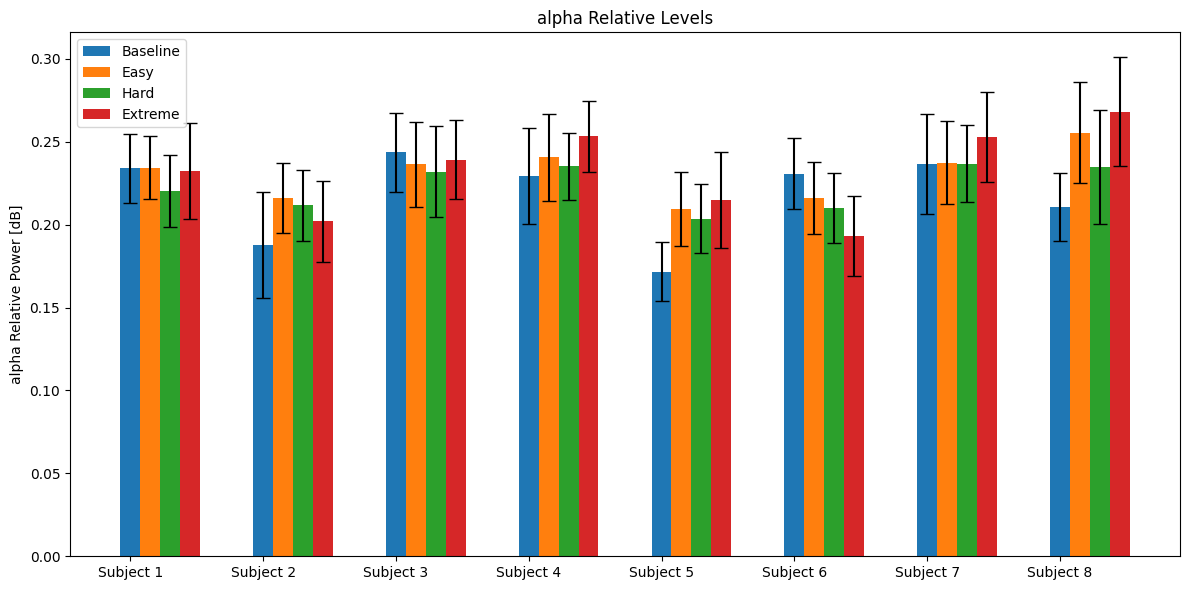

In [20]:
plot_relative("alpha", relative_front_data)

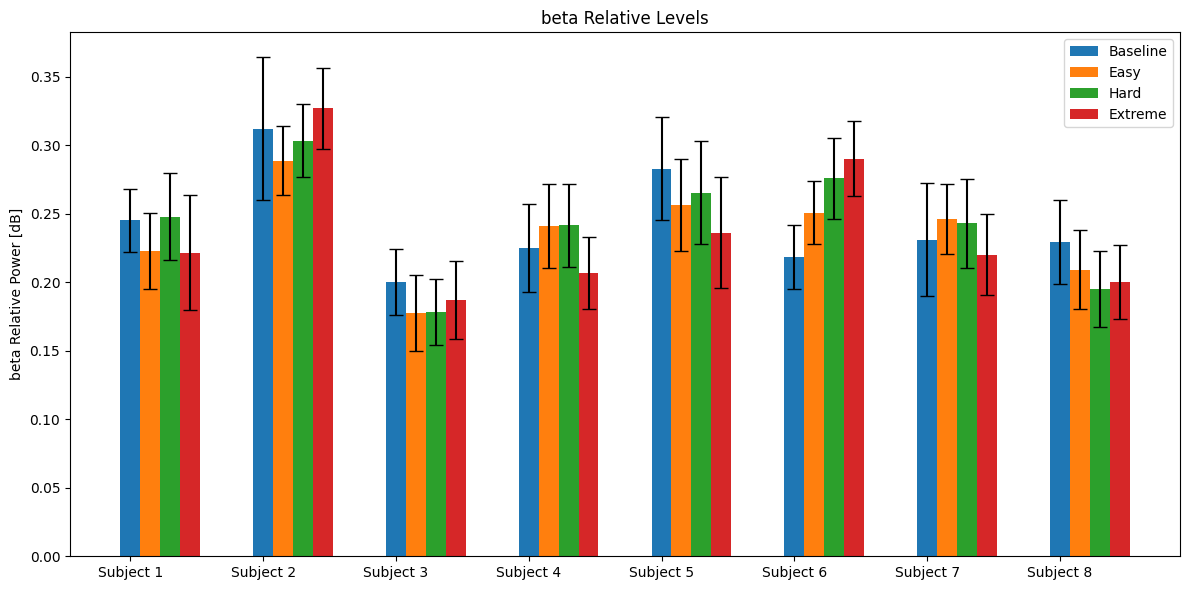

In [21]:
plot_relative("beta", relative_front_data)

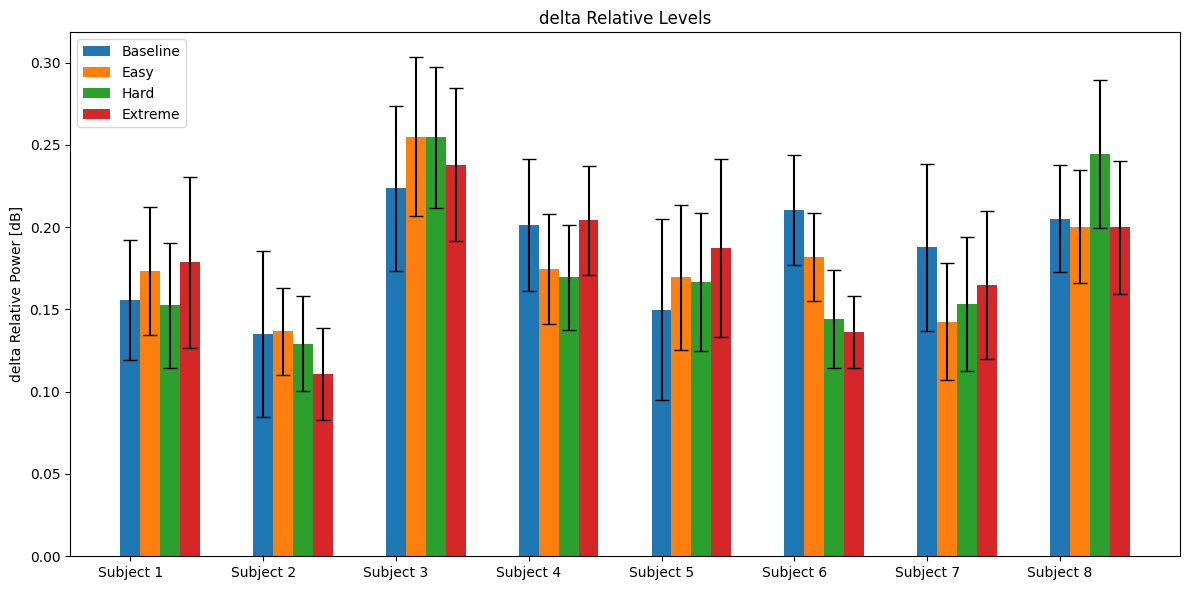

In [22]:
plot_relative("delta", relative_front_data)

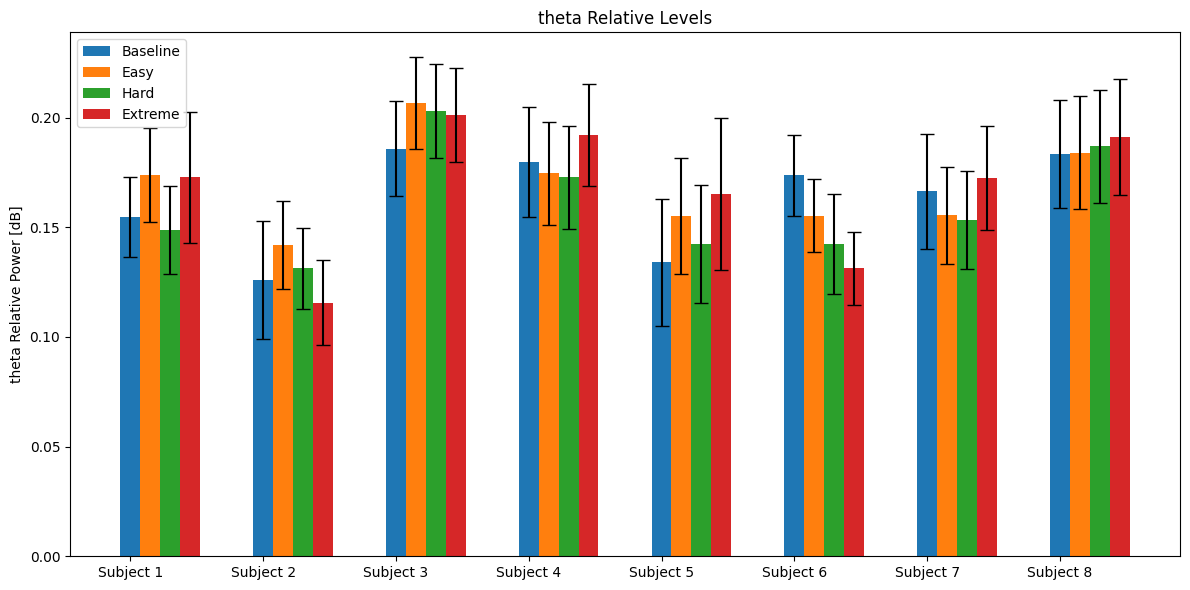

In [23]:
plot_relative("theta", relative_front_data)

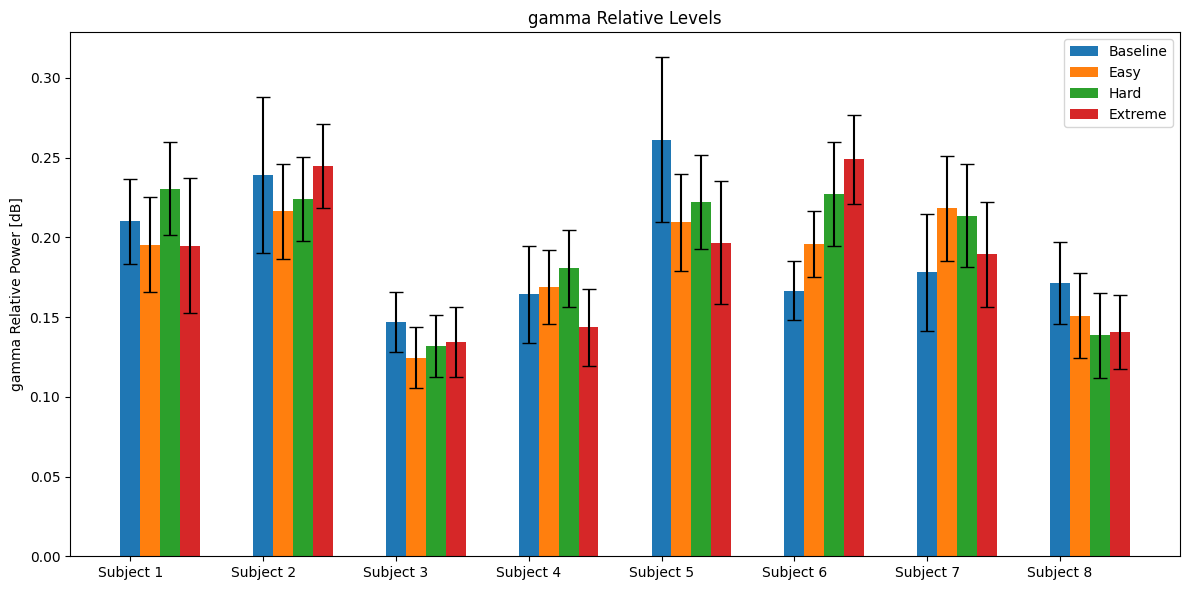

In [24]:
plot_relative("gamma", relative_front_data)

## 3.1.1 Back Relative

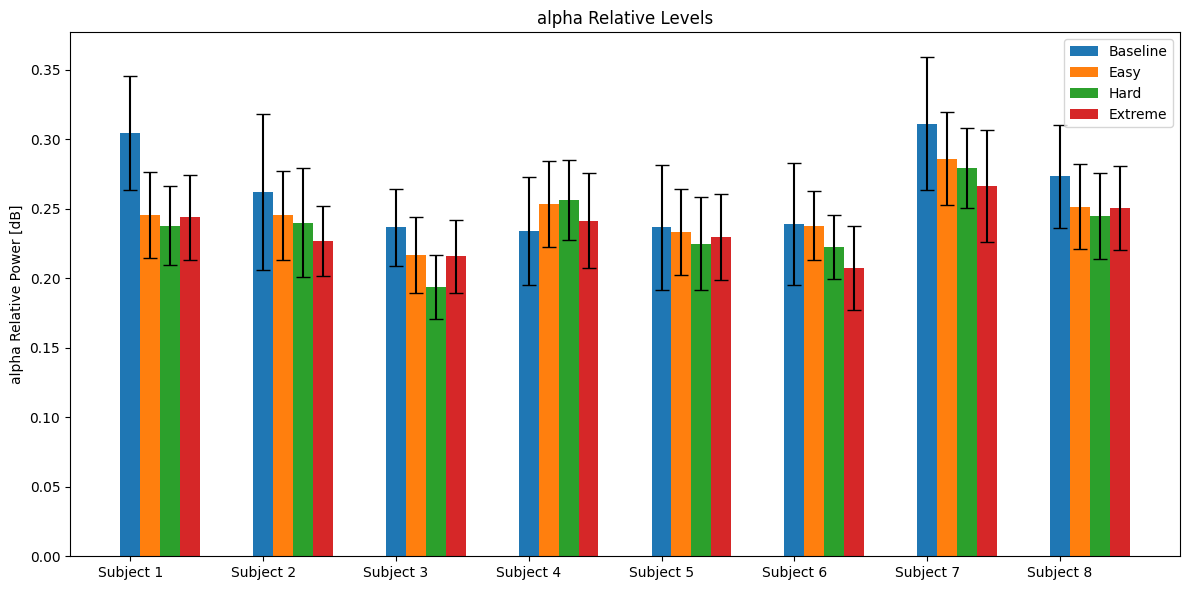

In [25]:
plot_relative("alpha", relative_back_data)

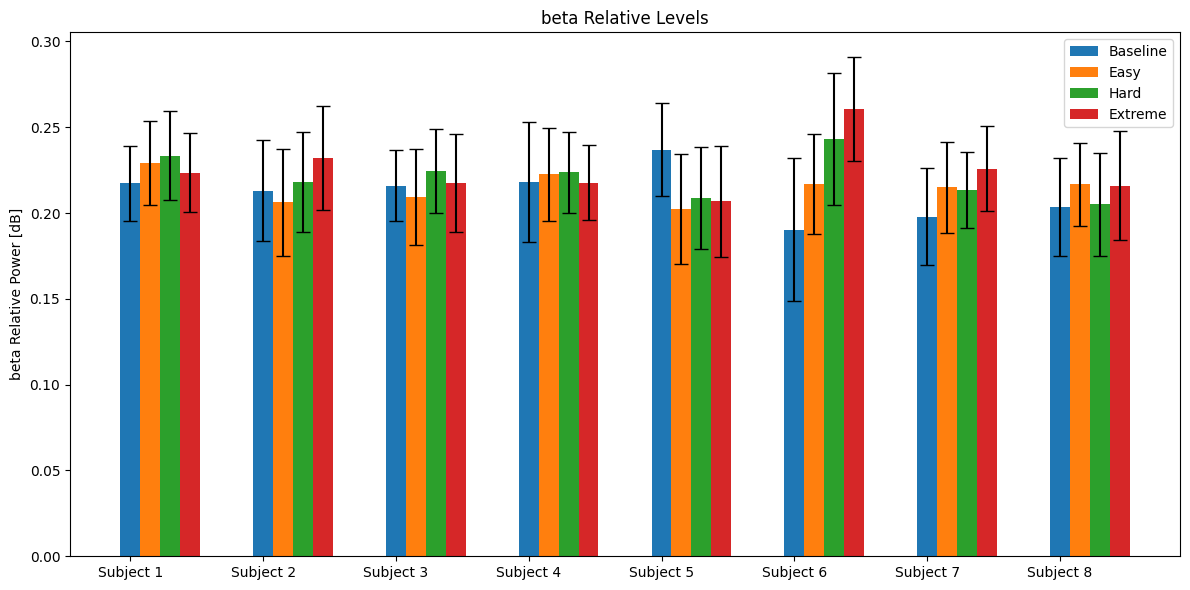

In [26]:
plot_relative("beta", relative_back_data)

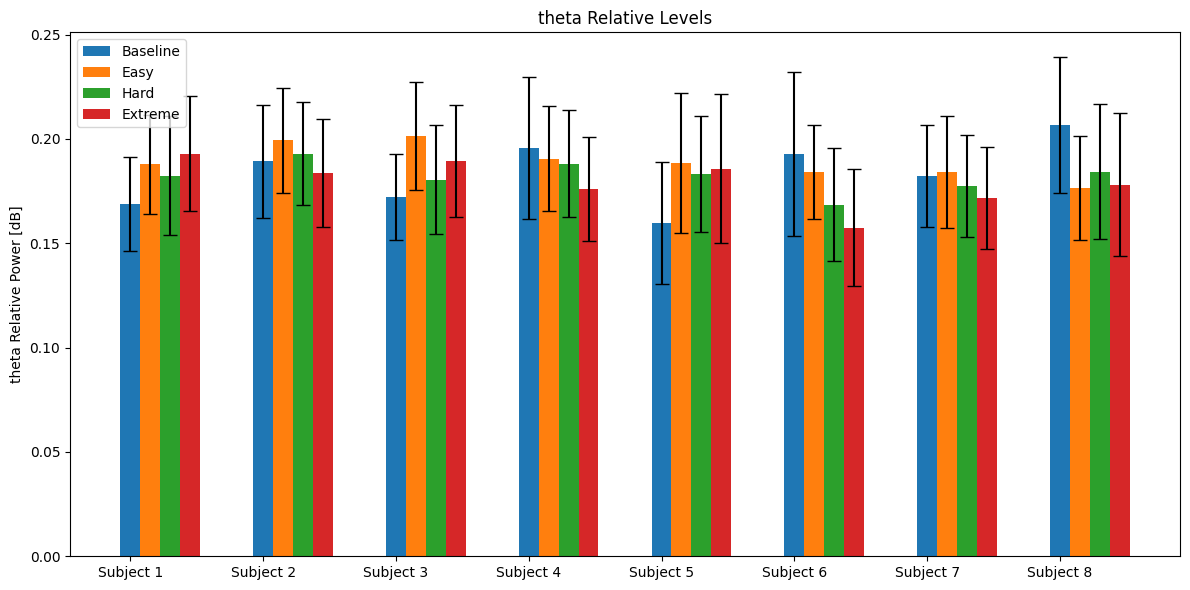

In [27]:
plot_relative("theta", relative_back_data)

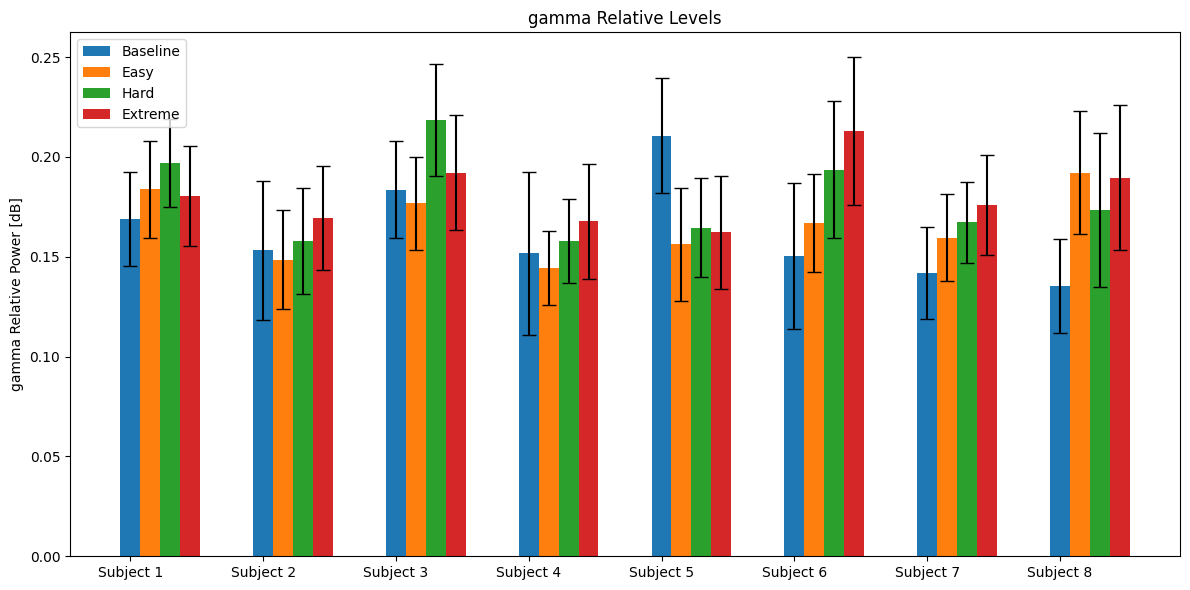

In [28]:
plot_relative("gamma", relative_back_data)

## 4 - Plotting Engagement Level

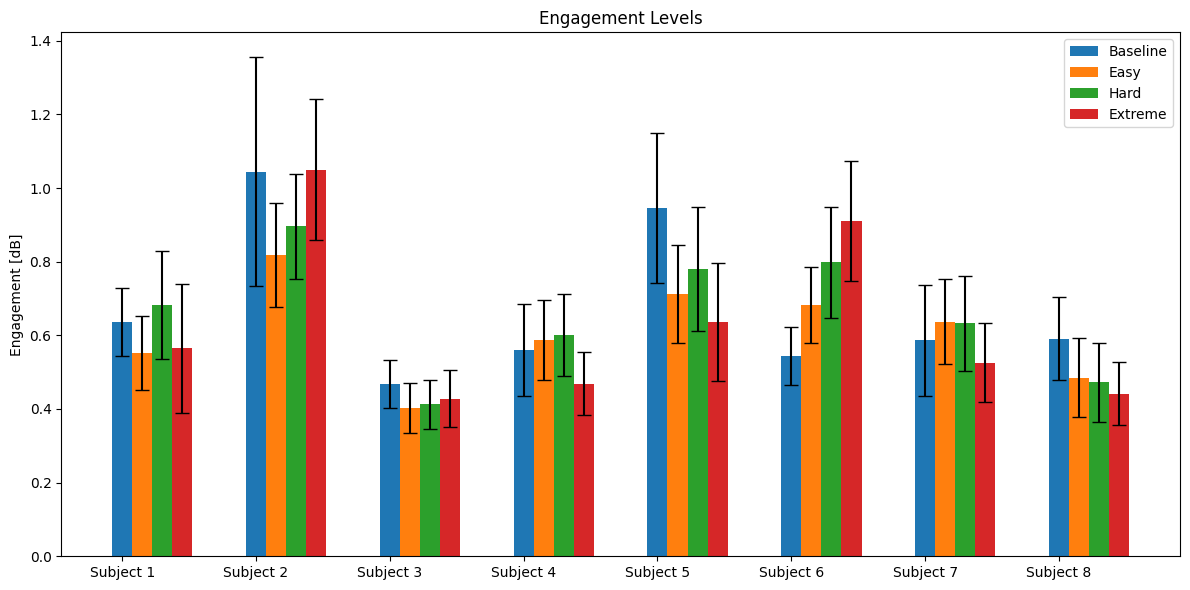

In [80]:
def plot_engagement(baseline, easy, hard, extreme):
    # Beta / (Alpha + Theta)
    alpha_ = get_wave("Alpha", "f", baseline, easy, hard, extreme)
    beta_ = get_wave("Beta", "f", baseline, easy, hard, extreme)
    theta_ = get_wave("Theta", "f", baseline, easy, hard, extreme)

    engagement = []
    
    for i in range(0, 4):
        engagement_ = []
        for j in range(n_subjects):
            engagement_.append(beta_[i][j] / (alpha_[i][j] + theta_[i][j]))

        engagement.append(engagement_)

    mean_base = [i.mean() for i in engagement[0]]
    mean_easy = [i.mean() for i in engagement[1]]
    mean_hard = [i.mean() for i in engagement[2]]
    mean_ext  = [i.mean() for i in engagement[3]]

    std_base = [i.std() for i in engagement[0]]
    std_easy = [i.std() for i in engagement[1]]
    std_hard = [i.std() for i in engagement[2]]
    std_ext  = [i.std() for i in engagement[3]]

    labels = [f'Subject {i+1}' for i in range(n_subjects)]
    x = np.arange(len(labels))
    width = 0.15

    fig, ax = plt.subplots(figsize=(12,6))
    rects1 = ax.bar(x,          mean_base, width, yerr=std_base, label = "Baseline", capsize = 5)
    rects2 = ax.bar(x+ width,   mean_easy, width, yerr=std_easy, label = "Easy", capsize = 5)
    rects4 = ax.bar(x+ 2*width, mean_hard, width, yerr=std_hard, label = "Hard", capsize = 5)
    rects5 = ax.bar(x+ 3*width, mean_ext, width, yerr=std_ext, label = "Extreme", capsize = 5)

    ax.set_ylabel("Engagement [dB]")
    ax.set_title("Engagement Levels")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()
    
plot_engagement(baseline, easy, hard, extreme)

## 5. Line Plot Visualization

### 5.1 Line Plot Visualization for A Specific Wave at a Specific Trial

In [81]:
def lineplot_wave(wave, placement, trial_type, trial_name):
    data_ = [process_and_average(i, wave, placement) for i in trial_type]
    
    min_length = min([len(i) for i in data_])
    trimmed_data = [i[:min_length] for i in data_]
    
    avg_data = np.mean(trimmed_data, axis=0)
    std_data = np.std(trimmed_data, axis=0)

    plt.figure(figsize=(14,8))
    for i in range(len(trimmed_data)):
        plt.plot(trimmed_data[i], alpha=0.6, label = "Subject " + str(i))

    plt.plot(avg_data, color = "r", label = "Average " + wave)
    
    plt.title(wave + " waves for " + trial_name + " trials")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Power [dB]")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

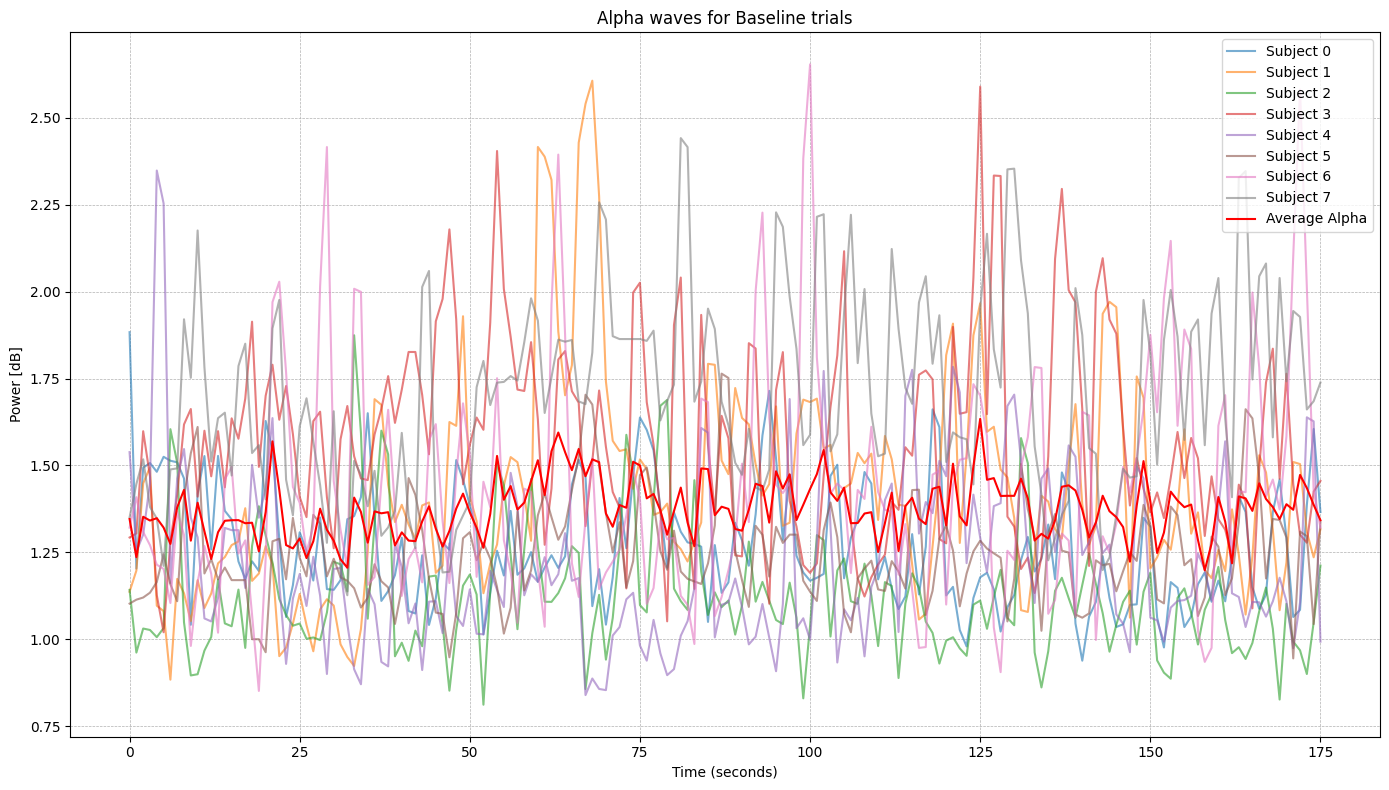

In [82]:
lineplot_wave("Alpha", "f", baseline, "Baseline")

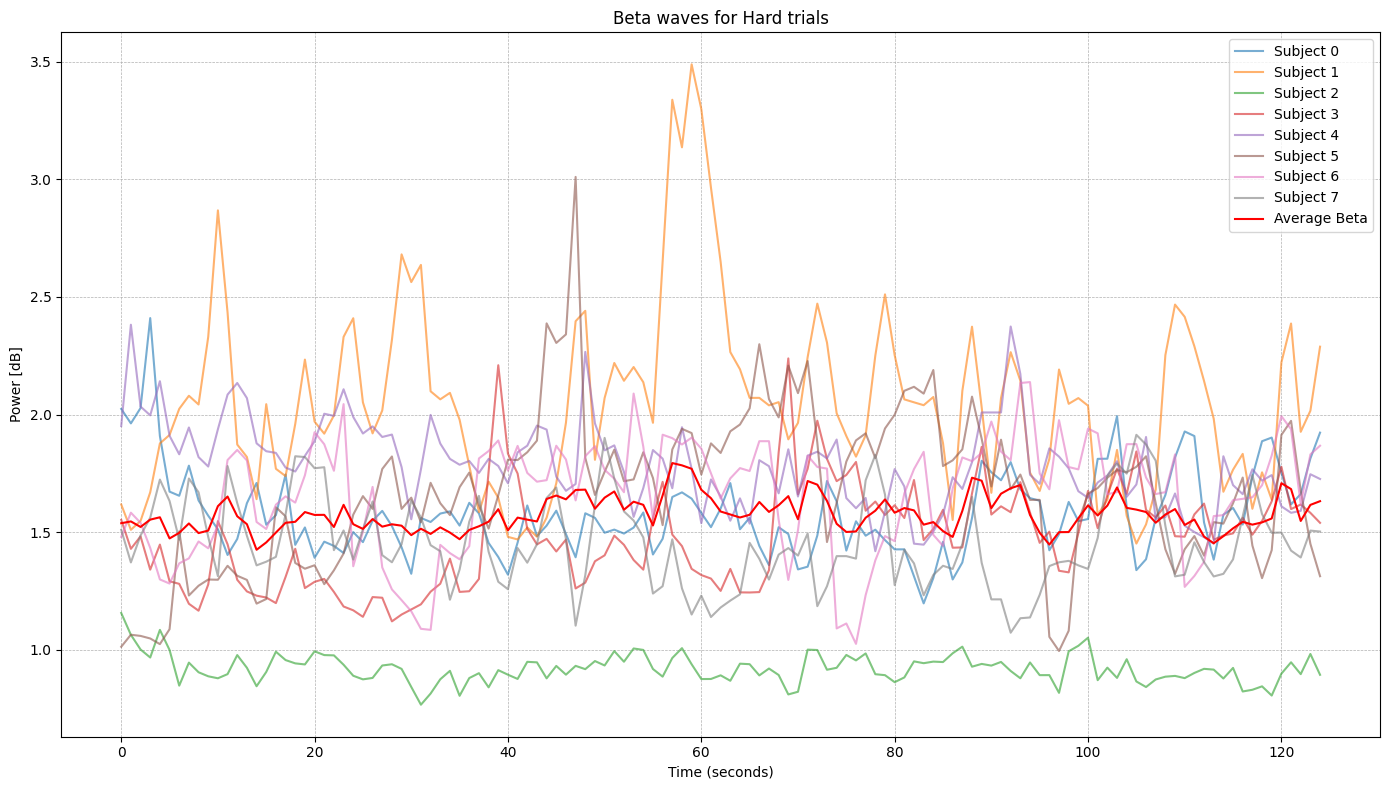

In [83]:
lineplot_wave("Beta", "f", hard, "Hard")

### 5.2 Line Plot Visualization of a subject

In [84]:
def lineplot_subject(subject, wave, placement, baseline, easy, hard, extreme):
    data_ = get_wave(wave, placement, baseline, easy, hard, extreme)
    if subject > len(data_[0]) or subject < 0:
        raise Exception('Invalid Subject')

    min_length = min([len(i[subject]) for i in data_])
    trimmed_data = [i[subject][:min_length] for i in data_]

    plt.figure(figsize=(14,8))
    plt.plot(trimmed_data[0], alpha=0.6, label="Baseline")
    plt.plot(trimmed_data[1], alpha=0.6, label="Easy")
    plt.plot(trimmed_data[2], alpha=0.6, label="Hard")
    plt.plot(trimmed_data[3], alpha=0.6, label="Extreme")
    
    plt.title(wave + " waves for Subject " + f'{subject}')
    plt.xlabel("Time (seconds)")
    plt.ylabel("Power [dB]")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

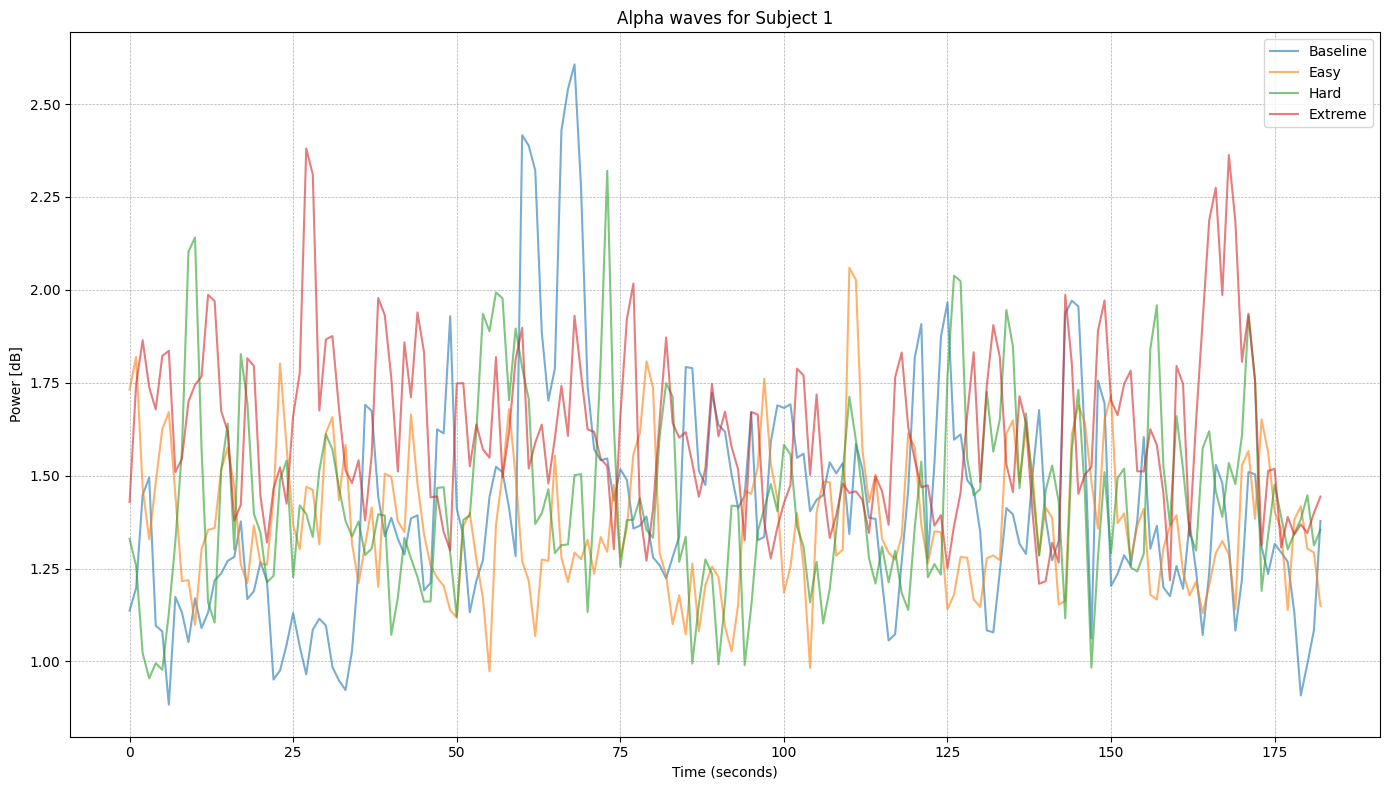

In [85]:
lineplot_subject(1, "Alpha", 'f', baseline, easy, hard, extreme)

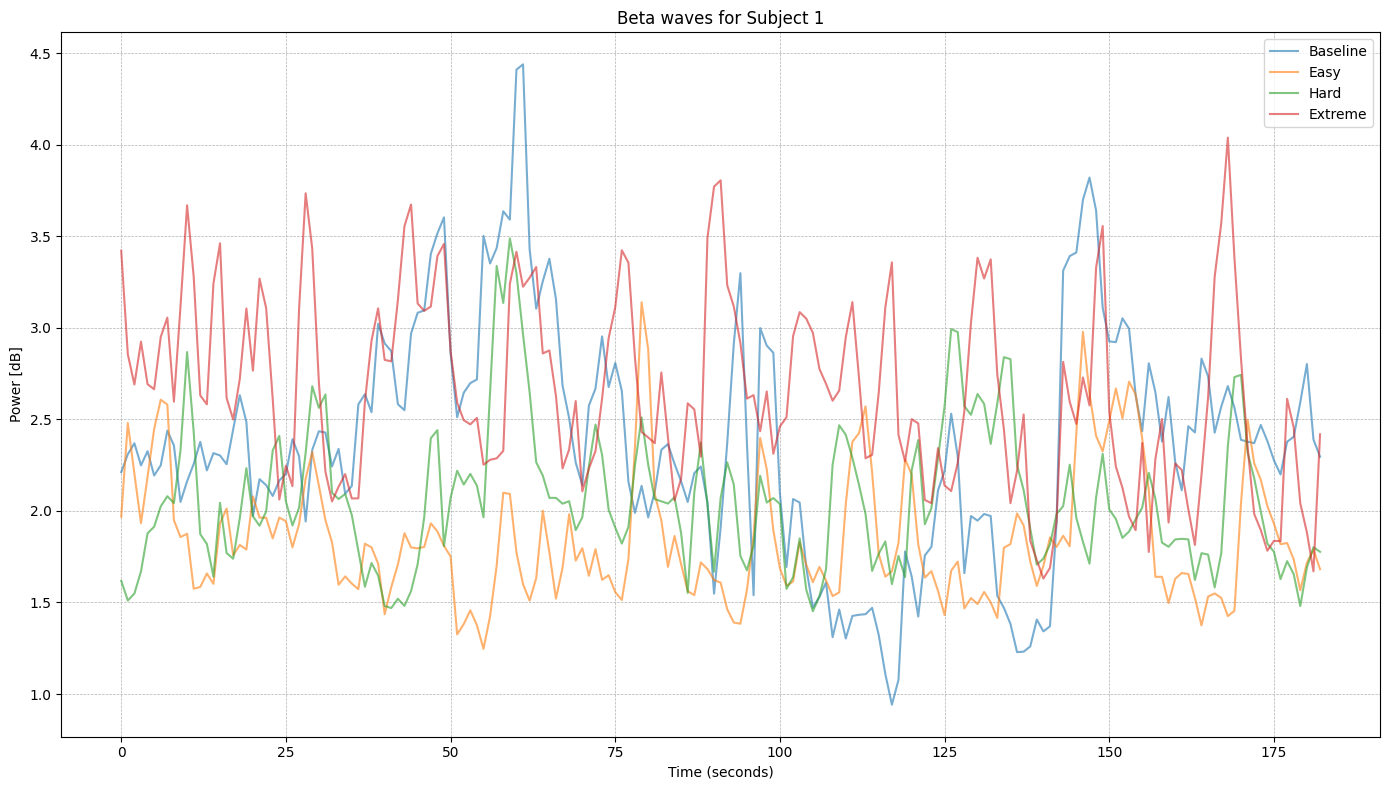

In [86]:
lineplot_subject(1, "Beta", 'f', baseline, easy, hard, extreme)

### 5.3 Line Plot Visualization for A Relative Waves at a Specific Trial

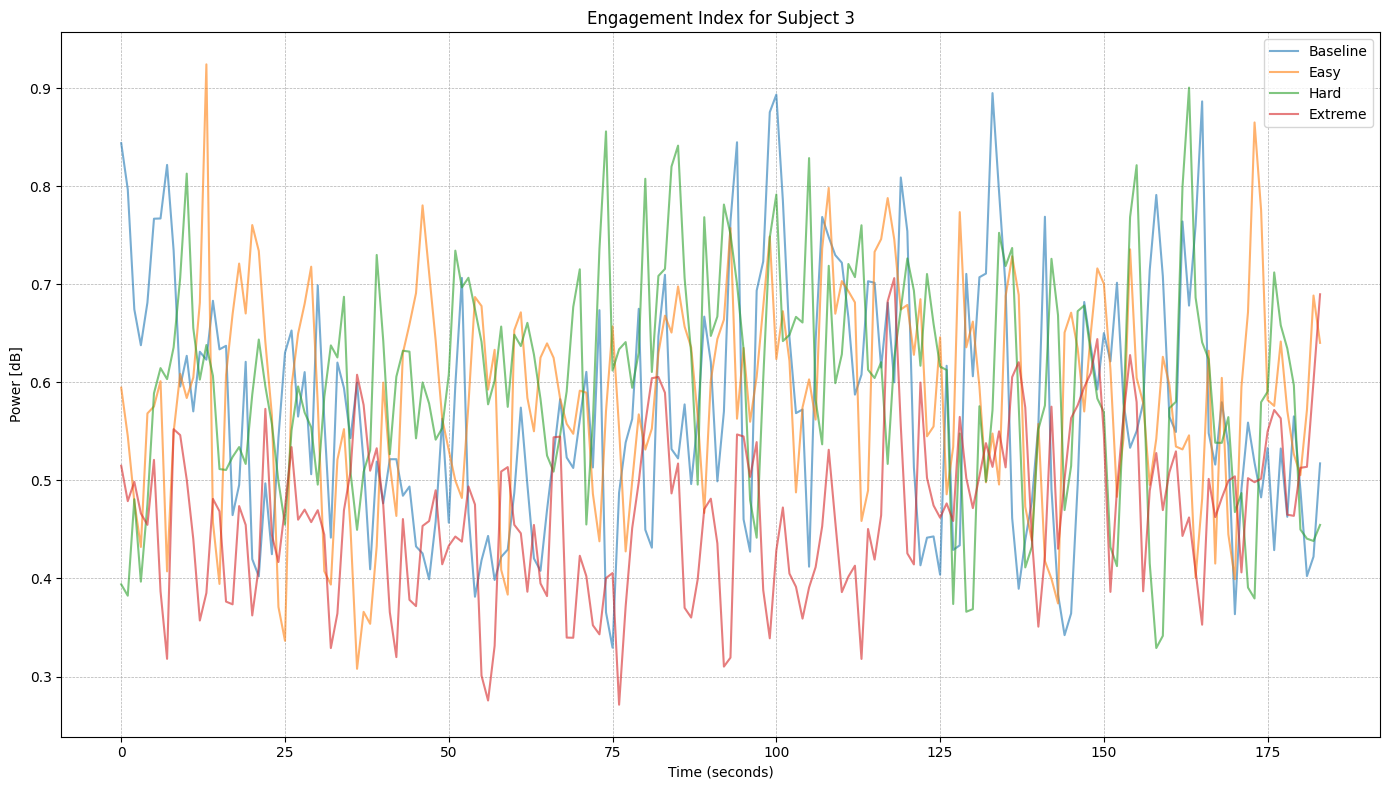

In [87]:
def lineplot_engagement(subject, baseline, easy, hard, extreme):
    # Beta / (Alpha + Theta)
    alpha_ = get_wave("Alpha", "f", baseline, easy, hard, extreme)
    beta_ = get_wave("Beta", "f", baseline, easy, hard, extreme)
    theta_ = get_wave("Theta", "f", baseline, easy, hard, extreme)

    engagement = []
    
    for i in range(0, 4):
        engagement_ = []
        for j in range(n_subjects):
            engagement_.append(beta_[i][j] / (alpha_[i][j] + theta_[i][j]))

        engagement.append(engagement_)

    min_length = min([len(i[subject]) for i in engagement])
    trimmed_data = [i[subject][:min_length] for i in engagement]

    plt.figure(figsize=(14,8))
    plt.plot(trimmed_data[0], alpha=0.6, label="Baseline")
    plt.plot(trimmed_data[1], alpha=0.6, label="Easy")
    plt.plot(trimmed_data[2], alpha=0.6, label="Hard")
    plt.plot(trimmed_data[3], alpha=0.6, label="Extreme")

    plt.title("Engagement Index for Subject " + f'{subject}')
    plt.xlabel("Time (seconds)")
    plt.ylabel("Power [dB]")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

lineplot_engagement(3, baseline, easy, hard, extreme)

### Box Plot


In [88]:
def plot_box_wave(wave, placement, baseline, easy, hard, extreme):
    """
    Return a specific wave from all trials
    
    Arguments:
        wave        -- String to identify wave type (Alpha, Beta, Theta, Gamma, Delta)
        placement   -- String to identify if it is back or front electrodes
        baseline    -- CSV Data Frame for all baseline trials
        easy        -- CSV Data Frame for all easy trials
        hard        -- CSV Data Frame for all hard trials
        extreme     -- CSV Data Frame for all extreme trials
    Returns:
        none        -- Prints Box Plots
    """

    # Gets Data for specific wave
    data = get_wave(wave, placement, baseline, easy, hard, extreme)

    # Changing Array Dimensions
    subjects = []

    for i in range(0, n_subjects):
        subject_data = []
        subject_data.append(data[0][i]) # Base
        subject_data.append(data[1][i]) # Easy
        subject_data.append(data[2][i]) # Hard
        subject_data.append(data[3][i]) # Extreme
        subjects.append(subject_data)

    # Plotting
    labels = [f'Subject {i+1}' for i in range(n_subjects)]
    x = np.arange(len(labels))
    width = 0.8

    fig, ax = plt.subplots(ncols=n_subjects, sharey=False, figsize=(15, 8))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    i = 0
    for ax, name in zip(ax, subjects):
        if i == 0:
            ax.set_ylabel(wave + " [dB]")

        bp = ax.boxplot(name, showfliers = False, widths = width, patch_artist=True)
        ax.set(xticklabels=['B', 'E', 'H', 'EX'], xlabel=labels[i])
        ax.margins(0.01) # Optional

        for box, color in zip(bp['boxes'], colors):
            box.set_facecolor(color)
            
        for m in bp['medians']:
            plt.setp(m, color='black')

        i += 1

    fig.tight_layout()
    plt.show()

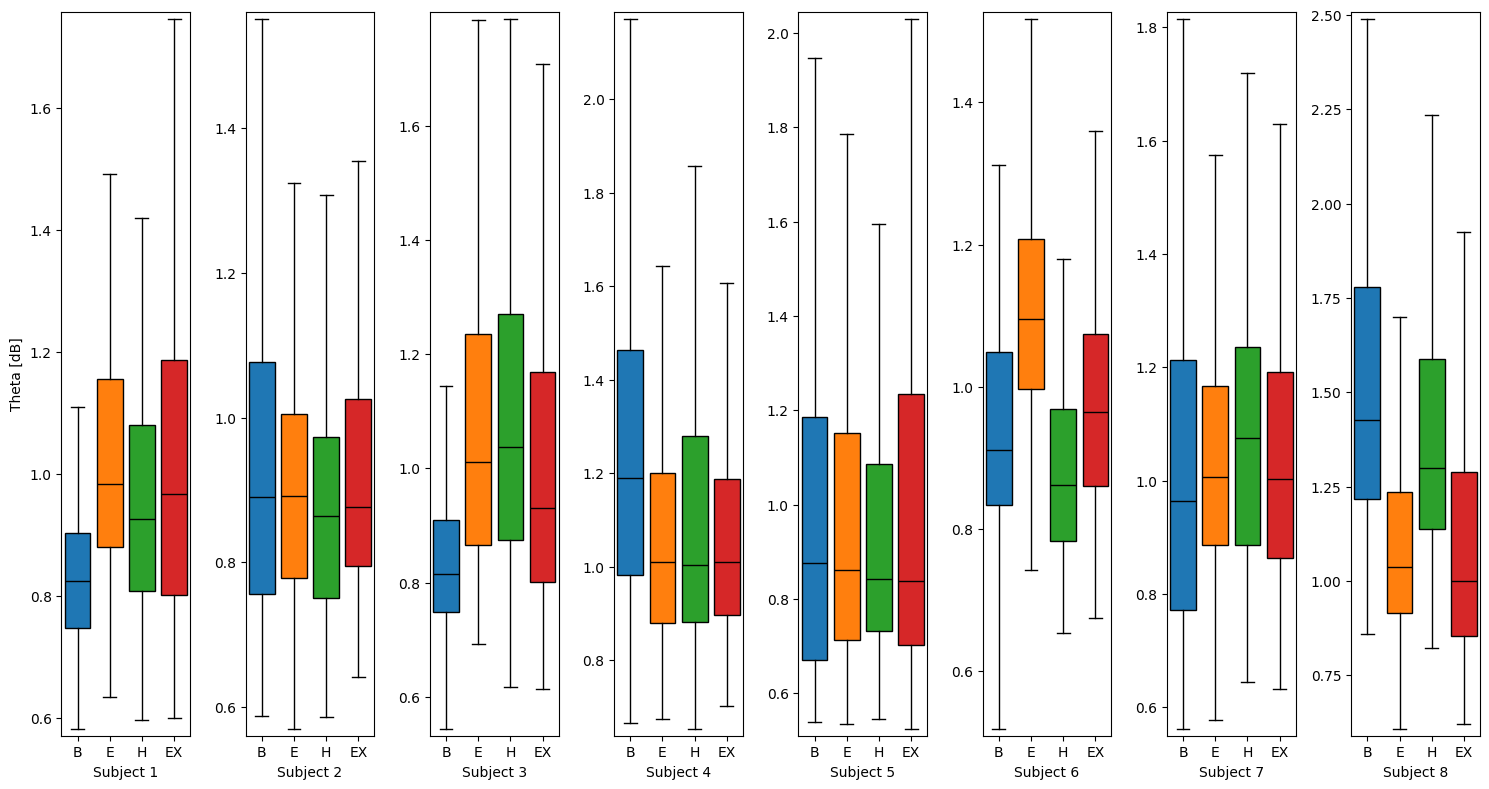

In [89]:
plot_box_wave("Theta", "f", baseline, easy, hard, extreme)

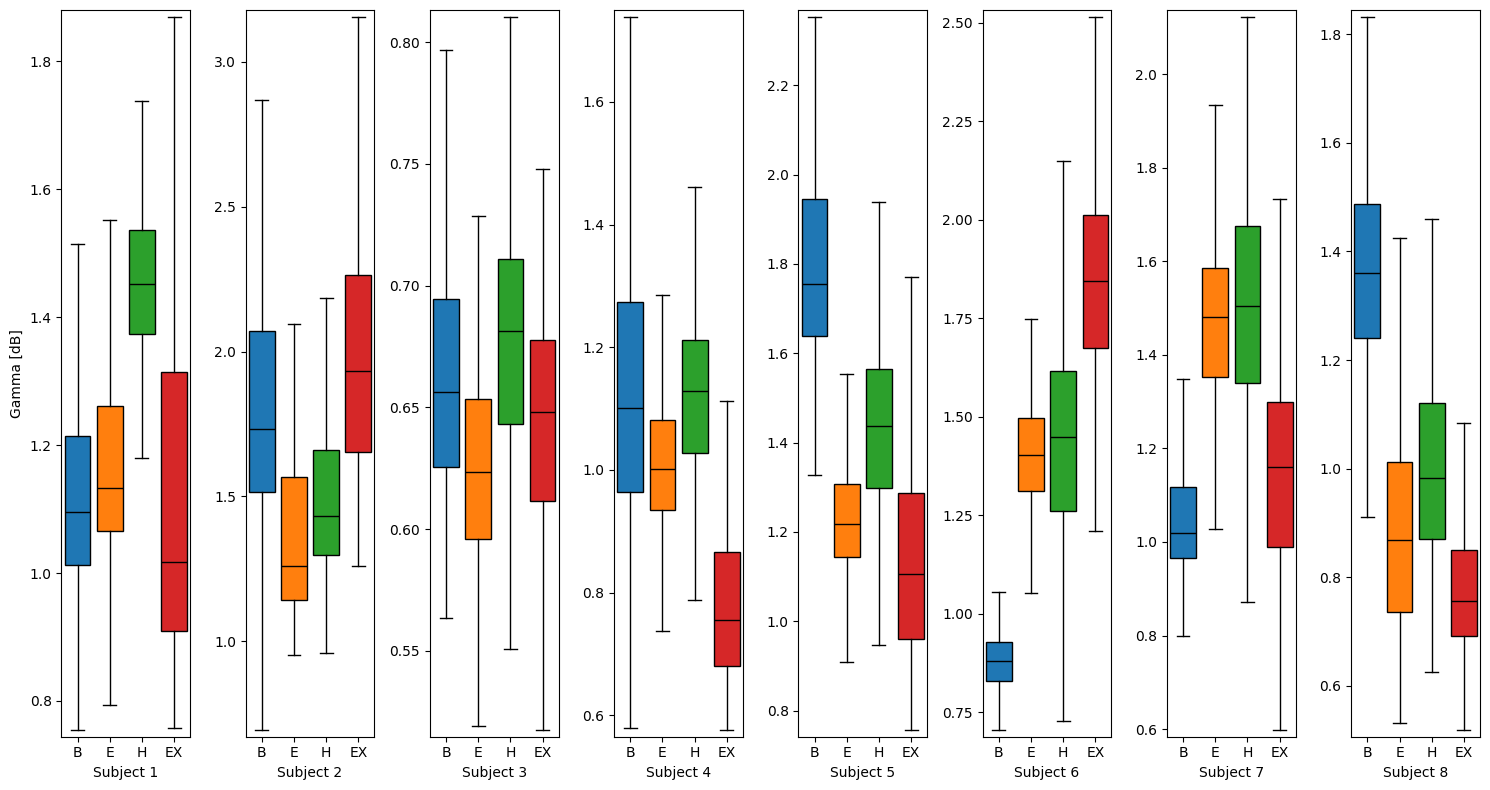

In [90]:
plot_box_wave("Gamma", "f", baseline, easy, hard, extreme)

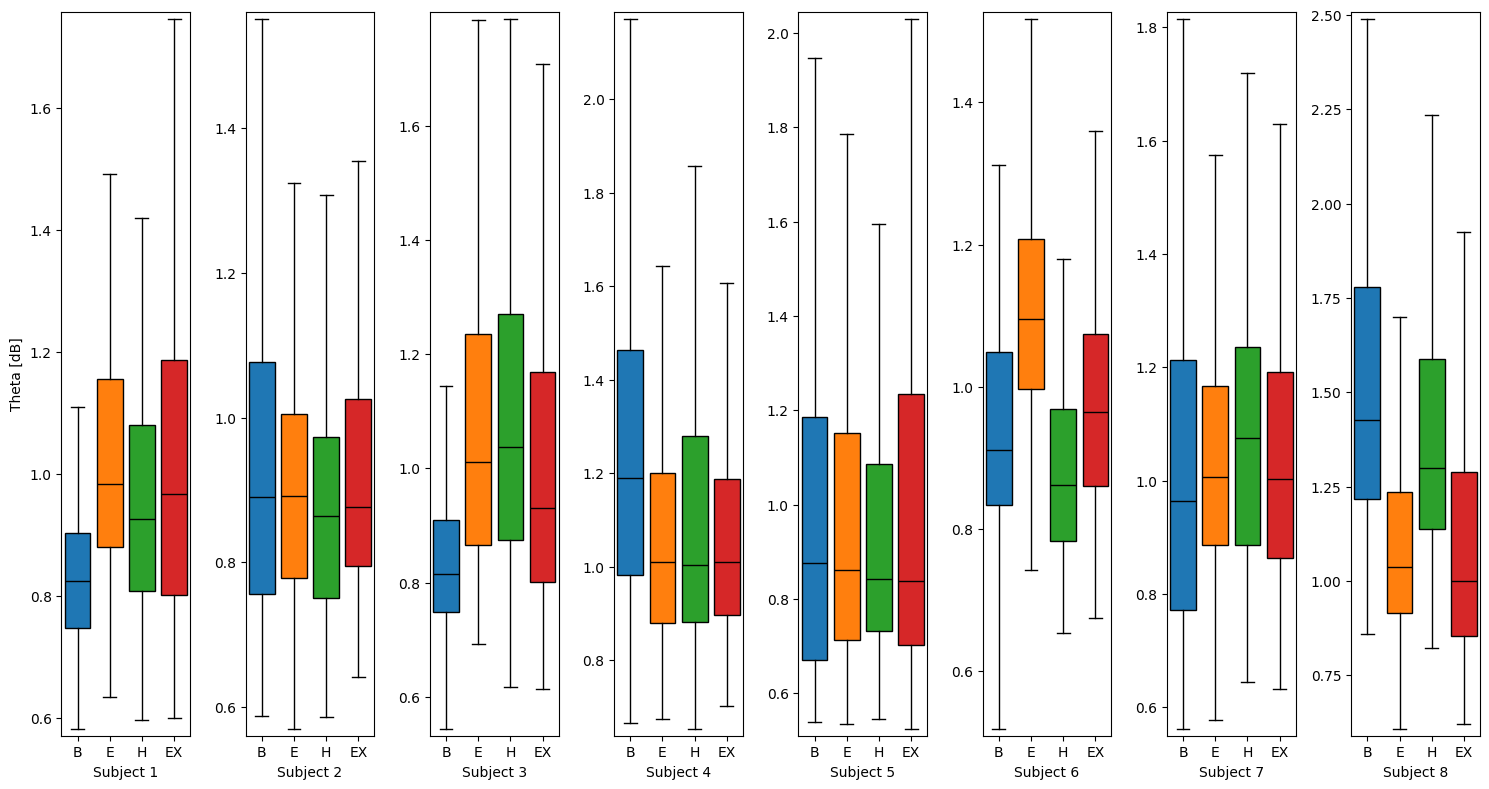

In [91]:
plot_box_wave("Theta", "f", baseline, easy, hard, extreme)

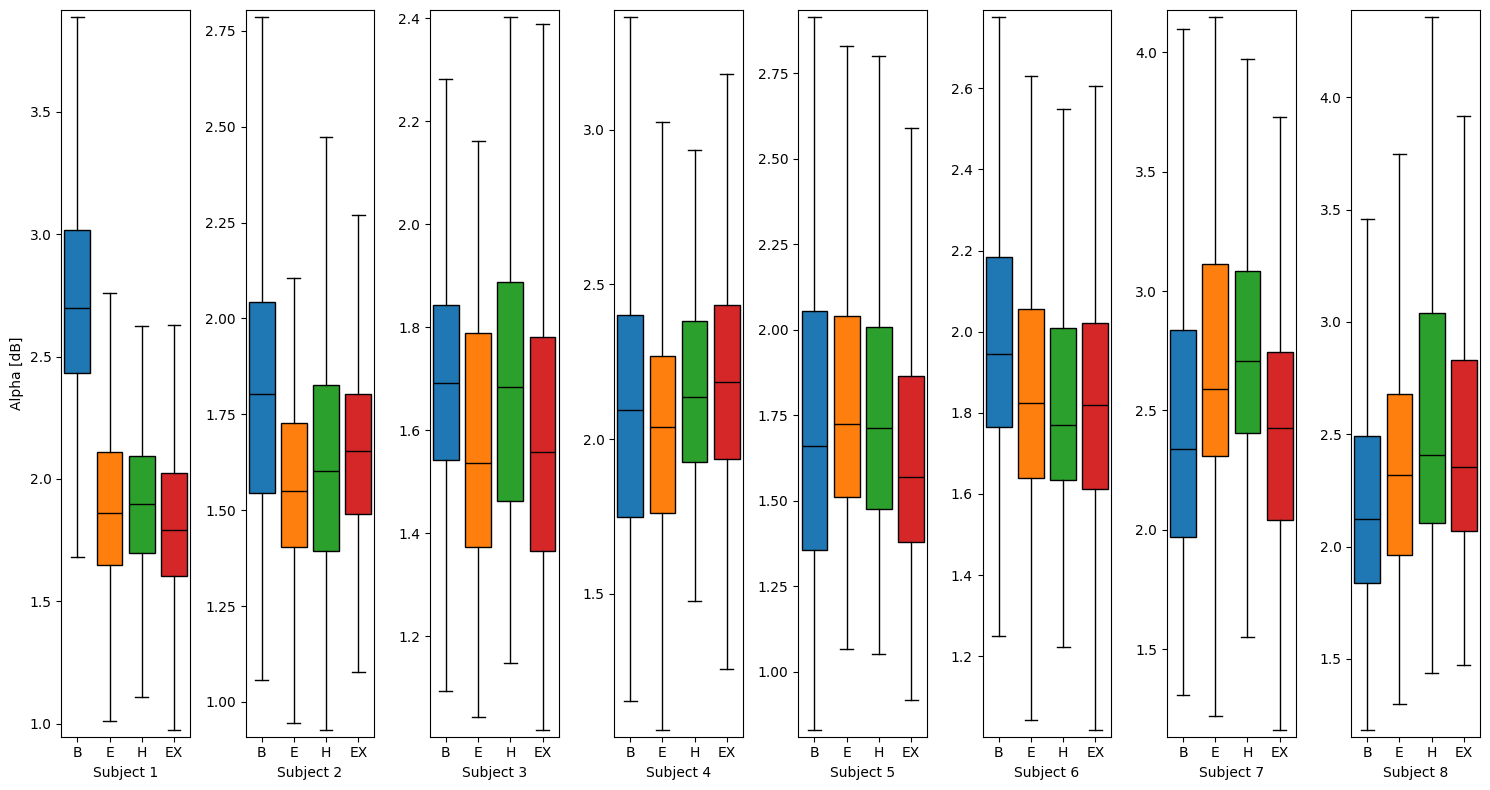

In [92]:
plot_box_wave("Alpha", "b", baseline, easy, hard, extreme)

## Box Plot Engagement

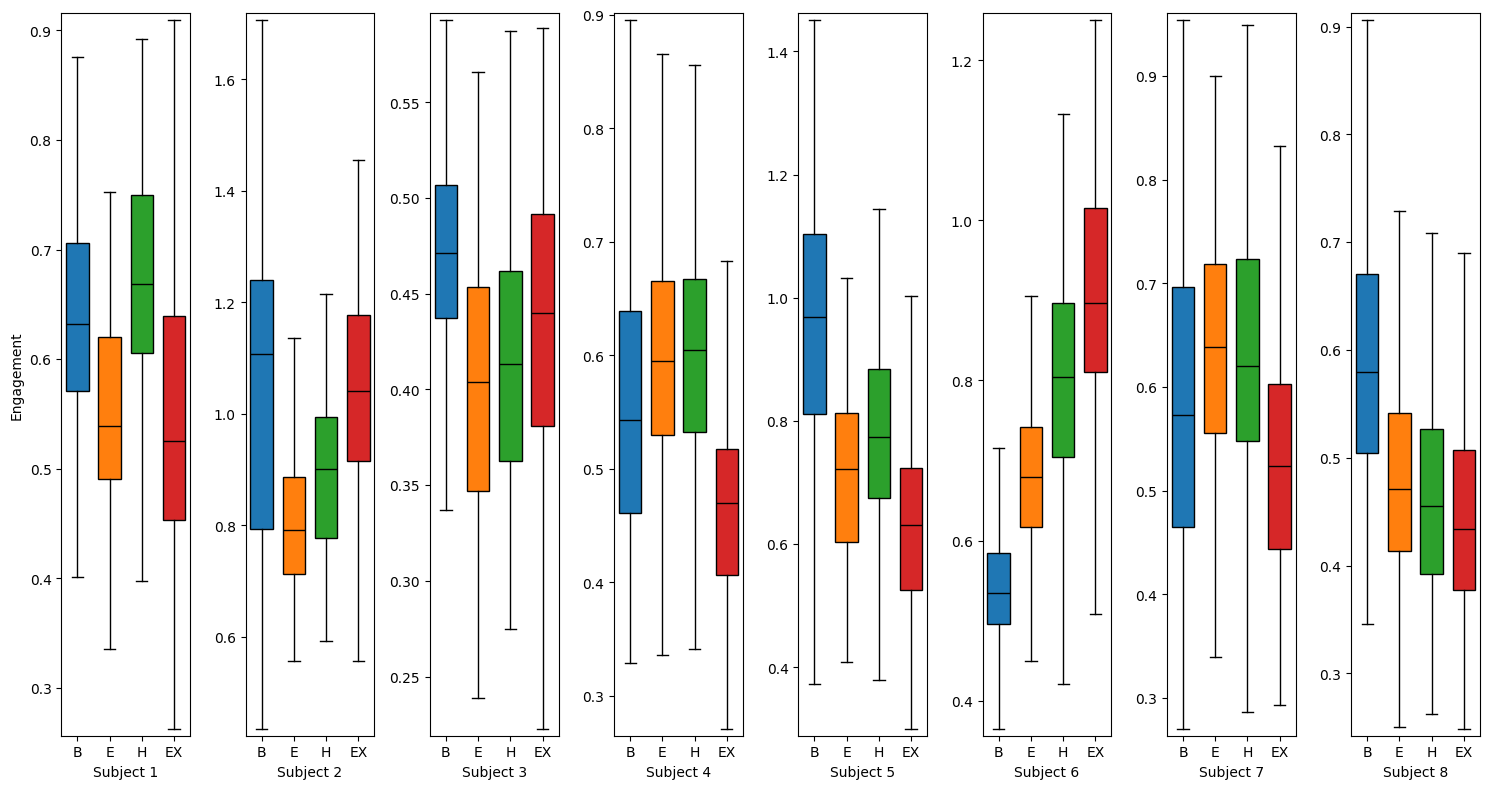

In [93]:
def plot_box_engagement(baseline, easy, hard, extreme):
    """
    Return a specific wave from all trials
    
    Arguments:
        wave        -- String to identify wave type (Alpha, Beta, Theta, Gamma, Delta)
        placement   -- String to identify if it is back or front electrodes
        baseline    -- CSV Data Frame for all baseline trials
        easy        -- CSV Data Frame for all easy trials
        hard        -- CSV Data Frame for all hard trials
        extreme     -- CSV Data Frame for all extreme trials
    Returns:
        none        -- Prints Box Plots
    """

    alpha_ = get_wave("Alpha", "f", baseline, easy, hard, extreme)
    beta_ = get_wave("Beta", "f", baseline, easy, hard, extreme)
    theta_ = get_wave("Theta", "f", baseline, easy, hard, extreme)

    engagement = []
    
    for i in range(0, 4):
        engagement_ = []
        for j in range(n_subjects):
            engagement_.append(beta_[i][j] / (alpha_[i][j] + theta_[i][j]))

        engagement.append(engagement_)

    # Changing Array Dimensions
    subjects = []

    for i in range(0, n_subjects):
        subject_data = []
        subject_data.append(engagement[0][i]) # Base
        subject_data.append(engagement[1][i]) # Easy
        subject_data.append(engagement[2][i]) # Hard
        subject_data.append(engagement[3][i]) # Extreme
        subjects.append(subject_data)

    # Plotting
    labels = [f'Subject {i+1}' for i in range(n_subjects)]
    x = np.arange(len(labels))
    width = 0.7

    fig, ax = plt.subplots(ncols=n_subjects, sharey=False, figsize=(15, 8))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    i = 0
    for ax, name in zip(ax, subjects):
        if i == 0:
            ax.set_ylabel("Engagement")

        bp = ax.boxplot(name, showfliers = False, widths = width, patch_artist=True)
        ax.set(xticklabels=['B', 'E', 'H', 'EX'], xlabel=labels[i])
        ax.margins(0.01) # Optional

        for box, color in zip(bp['boxes'], colors):
            box.set_facecolor(color)
            
        for m in bp['medians']:
            plt.setp(m, color='black')

        i += 1

    fig.tight_layout()
    plt.show()

plot_box_engagement(baseline, easy, hard, extreme)

# Aggregate

In [100]:
def plot_aggregate(wave, placement, baseline, easy, hard, extreme):
    """
    Return a specific wave from all trials
    
    Arguments:
        wave        -- String to identify wave type (Alpha, Beta, Theta, Gamma, Delta)
        placement   -- String to identify if it is back or front electrodes
        baseline    -- CSV Data Frame for all baseline trials
        easy        -- CSV Data Frame for all easy trials
        hard        -- CSV Data Frame for all hard trials
        extreme     -- CSV Data Frame for all extreme trials
    Returns:
        none        -- Prints Box Plots
    """

    # Gets Data for specific wave
    data = get_wave(wave, placement, baseline, easy, hard, extreme)

    # Calculate mean
    mean_base = [i.mean() for i in data[0]]
    mean_easy = [i.mean() for i in data[1]]
    mean_hard = [i.mean() for i in data[2]]
    mean_ext  = [i.mean() for i in data[3]]

    means = [np.mean(mean_base), np.mean(mean_easy), np.mean(mean_hard), np.mean(mean_ext)]
    stds = [np.std(mean_base), np.std(mean_easy),  np.std(mean_hard), np.std(mean_ext)]
    # Plotting
    labels = ["Baseline", "Easy", "Hard", "Extreme"]
    width = 1

    fig, ax = plt.subplots(figsize=(12,6))
    rects = ax.bar(labels, means, width,  yerr=stds, capsize = 5)

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    for box, color in zip(rects.patches, colors):
            box.set_facecolor(color)

    # Labels
    electrode_placement = ""
    if placement.lower() == "f":
        electrode_placement = "Front"
    else:
        electrode_placement = "Back"

    ax.set_ylabel(wave + " [dB]")
    ax.set_title(electrode_placement + " " + wave + " Levels")

    fig.tight_layout()
    plt.show()

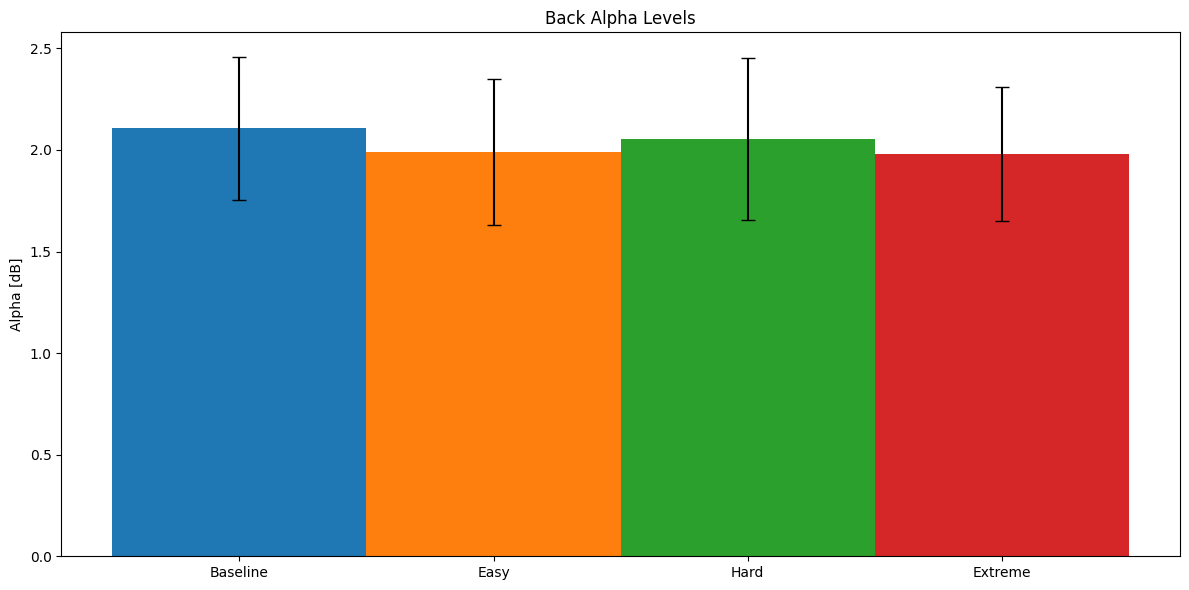

In [101]:
plot_aggregate("Alpha", "b", baseline, easy, hard, extreme)

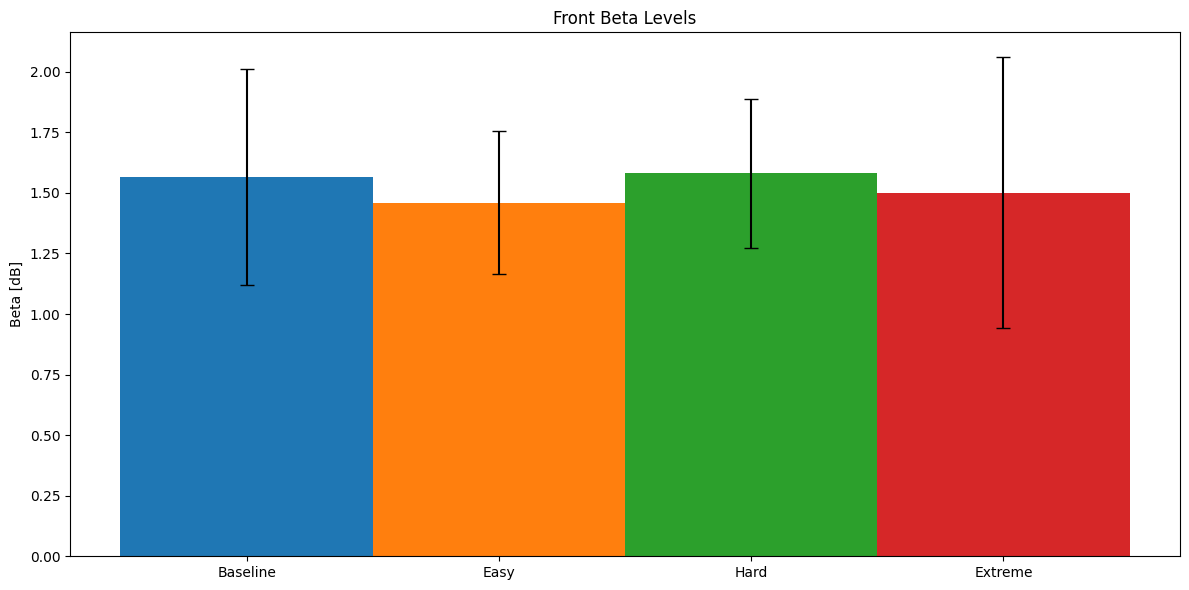

In [102]:
plot_aggregate("Beta", "f", baseline, easy, hard, extreme)

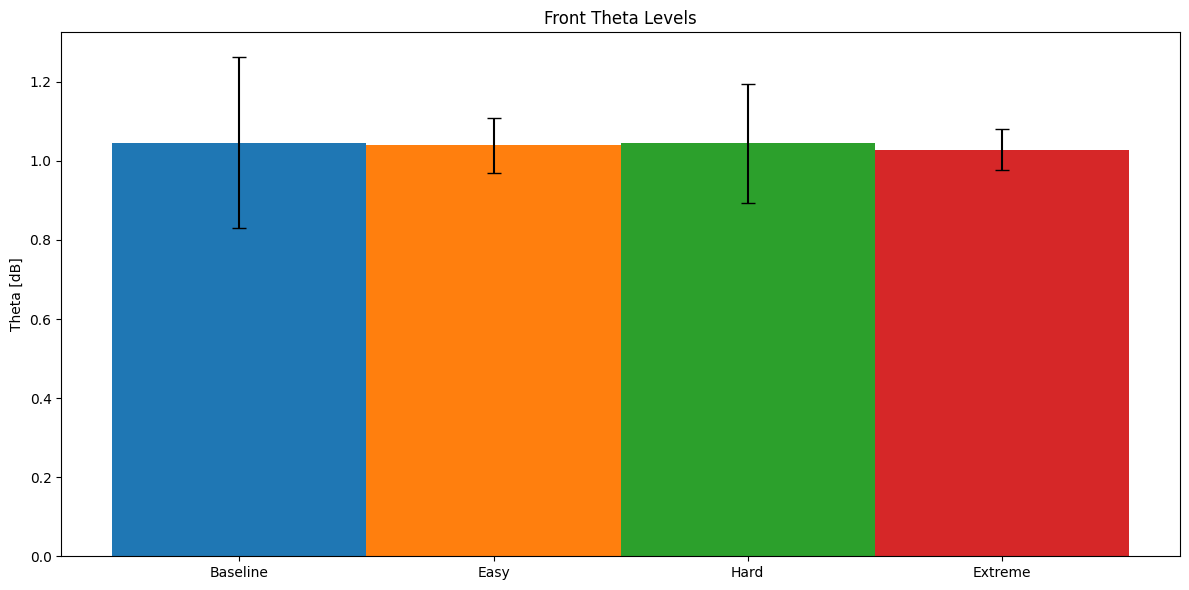

In [103]:
plot_aggregate("Theta", "f", baseline, easy, hard, extreme)

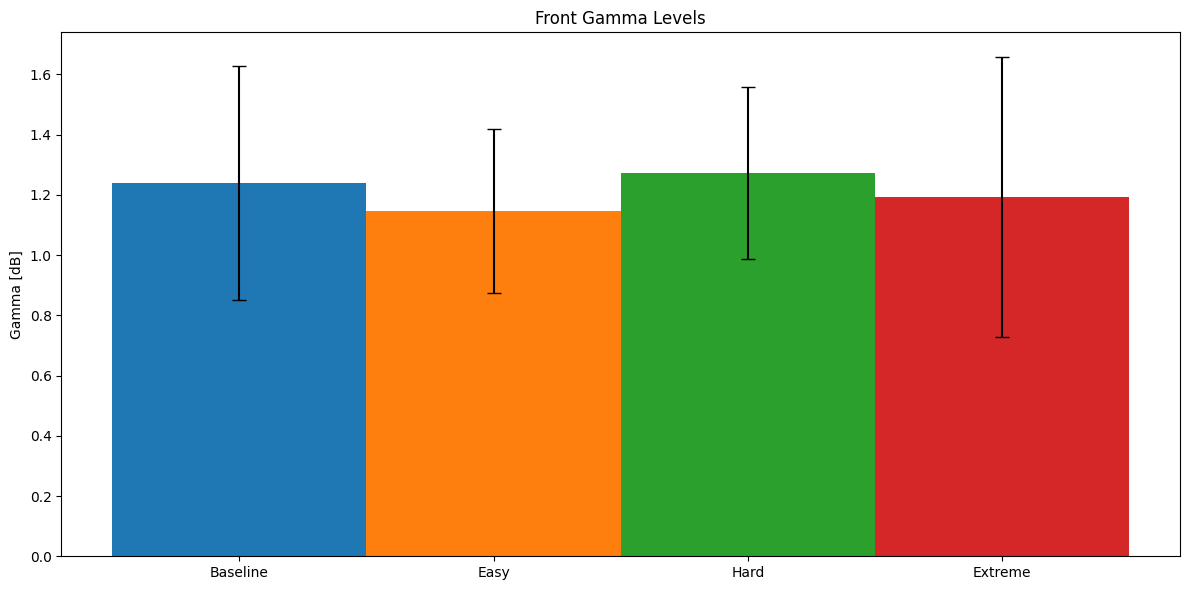

In [104]:
plot_aggregate("Gamma", "f", baseline, easy, hard, extreme)

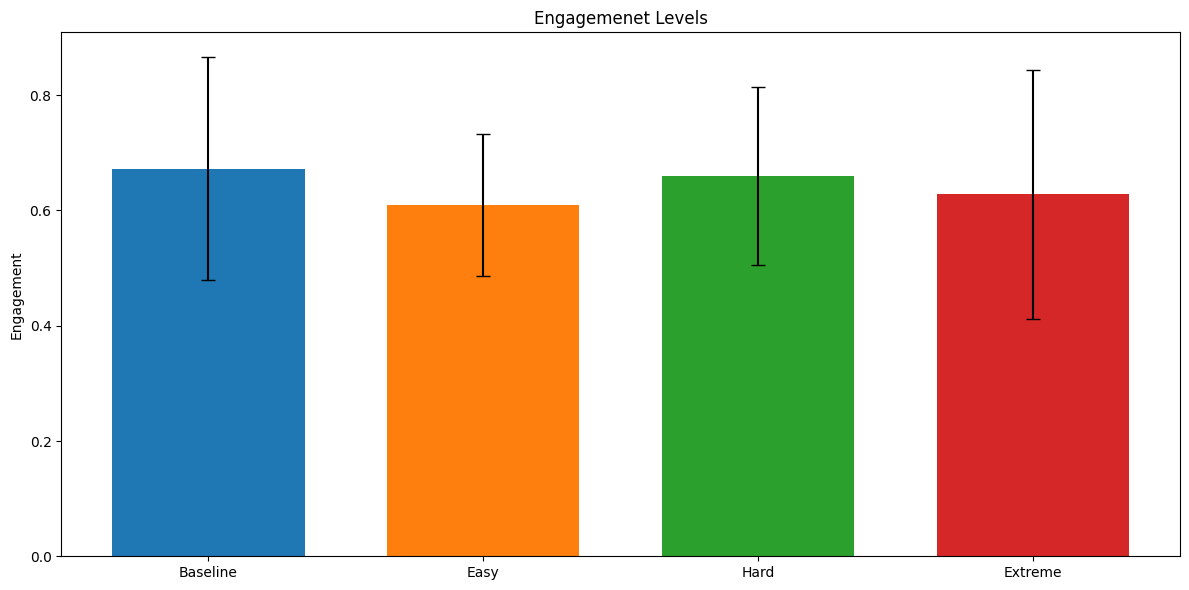

In [99]:
def plot_aggregate_engagement(baseline, easy, hard, extreme):
    """
    Return a specific wave from all trials
    
    Arguments:
        wave        -- String to identify wave type (Alpha, Beta, Theta, Gamma, Delta)
        placement   -- String to identify if it is back or front electrodes
        baseline    -- CSV Data Frame for all baseline trials
        easy        -- CSV Data Frame for all easy trials
        hard        -- CSV Data Frame for all hard trials
        extreme     -- CSV Data Frame for all extreme trials
    Returns:
        none        -- Prints Box Plots
    """

    alpha_ = get_wave("Alpha", "f", baseline, easy, hard, extreme)
    beta_ = get_wave("Beta", "f", baseline, easy, hard, extreme)
    theta_ = get_wave("Theta", "f", baseline, easy, hard, extreme)

    engagement = []
    
    for i in range(0, 4):
        engagement_ = []
        for j in range(n_subjects):
            engagement_.append(beta_[i][j] / (alpha_[i][j] + theta_[i][j]))

        engagement.append(engagement_)

    # Calculate mean
    mean_base = [i.mean() for i in engagement[0]]
    mean_easy = [i.mean() for i in engagement[1]]
    mean_hard = [i.mean() for i in engagement[2]]
    mean_ext  = [i.mean() for i in engagement[3]]

    means = [np.mean(mean_base), np.mean(mean_easy), np.mean(mean_hard), np.mean(mean_ext)]
    stds = [np.std(mean_base), np.std(mean_easy), np.std(mean_hard), np.std(mean_ext)]
    # # Plotting
    labels = ["Baseline", "Easy", "Hard", "Extreme"]
    width = 0.7

    fig, ax = plt.subplots(figsize=(12,6))
    rects = ax.bar(labels, means, width,  yerr=stds, capsize = 5)

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    for box, color in zip(rects.patches, colors):
            box.set_facecolor(color)

    ax.set_ylabel("Engagement")
    ax.set_title("Engagemenet Levels")

    fig.tight_layout()
    plt.show()

plot_aggregate_engagement(baseline, easy, hard, extreme)